## Analyzing borrowers’ risk of defaulting

<span style="color:blue">**Project description:**</span> In this project, we prepare a report for a bank’s loan division to find out if a customer's profile such as his/her marital or children status has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

The report will be considered when building a **credit scoring** of a potential customer. A **credit scoring** is used to evaluate the ability of a potential borrower to repay their loan.

<span style="color:blue">**Organization of the report:**</span> The report is divded into three sections:

- In Step1, we make an initial assessment on the quality of the raw data,
- In Step2, we build a data preprocessing strategy and preprocess the raw data accordingly,
- In Step3, we answer the following questions with the help of the bank's data we just have cleaned up:
    1. Is there a connection between having kids and repaying a loan on time
    2. Is there a connection between marital status and repaying a loan on time?
    3. Is there a connection between income level and repaying a loan on time?
    4. How do different loan purposes affect on-time loan repayment?

Each section closes with a conclusions. 

<span style="color:blue">**Importing libraries:**</span> We close the introduction by importing all code libraries and output style functions we will be using in our work. 

In [1]:
# Import libraries and define output style functions.

# Import the pandas library 
#      (url-> https://pandas.pydata.org/).
import pandas as pd

# Import the numpy library 
#      (url-> https://pandas.pydata.org/).
import numpy as np

# Import pyplot module from matplotlib 
#      (url-> https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html).
import matplotlib.pyplot as plt

# Import Markdown and display modules from IPython.display library 
#      (url -> https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html).
from IPython.display import Markdown, display
# Define printmd() function to print code in blue color.
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))


### Step 1. Data format and statistical description

The bank handed us its dataset 'credit_scoring_eng.csv' together with the following basic description about the data they have for the customers:

- <span style="color:blue">**children:**</span> the number of children in the family
- <span style="color:blue">**days_employed:**</span> how long the customer has been working
- <span style="color:blue">**dob_years:**</span> the customer’s age
- <span style="color:blue">**education:**</span> the customer’s education level
- <span style="color:blue">**education_id:**</span> identifier for the customer’s education
- <span style="color:blue">**family_status:**</span> the customer’s marital status
- <span style="color:blue">**family_status_id:**</span> identifier for the customer’s marital status
- <span style="color:blue">**gender:**</span> the customer’s gender
- <span style="color:blue">**income_type:**</span> the customer’s income type
- <span style="color:blue">**debt:**</span> whether the customer has ever defaulted on a loan
- <span style="color:blue">**total_income:**</span> monthly income
- <span style="color:blue">**purpose:**</span> reason for taking out a loan

We proceed in two subsections. First, we load the dataset into our workspace and obtain some general information about its format and content. Next, we explore how the data is distributed in each column and what possible values it takes. 

### Step 1-a. General Information about the dataset

Let us open the data file and explore the format in which information is stored.

In [2]:
# Read comma-separated values (csv) file into a pandas DataFrame object using pandas.read_csv() method.
# Use try...except to make sure the project runs both on local machine and platform
try:
    customers_data = pd.read_csv('credit_scoring_eng.csv') # path on local machine
except:
    customers_data = pd.read_csv('/datasets/credit_scoring_eng.csv') # path on Practicum100 platform

# Print a concise summary of a DataFrame with pandas.DataFrame.info() method.
customers_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


From the information provided, we see that we have $21525$ entries with $12$ columns. The column names indeed match the ones described by the bank. Among these columns, we have
- $5$ columns of type 'int64': 'children', 'dob_years', 'education_id', 'family_status_id', 'debt',
- $2$ columns of type 'float64': 'days_employed', 'total_income',
- $5$ columns of type 'string' object: 'education', 'family_status', 'gender', 'income_type', 'purpose'.

We also note that only the two columns 'days_employed' and 'total_income' of type 'float64' returned an equal number of missing values. From Pandas documentation, see link (https://pandas.pydata.org/pandas-docs/stable/user_guide/integer_na.html), we know that missing values are given the value NaN ("Not a Number"), which has a float data type. This might be the reason why these columns are of type 'float64'.

Finally, we learn that the data uses about $2$ MB of memory. Since we work with a relatively small dataset, we do not worry about memory space during this project.

To get a first impression on the content populating the dataset, let us display few of its entries.

In [3]:
# Display rows of the DataFrame using the display() method.

# Call pandas.DataFrame.head(n=5) to get the first five rows of a DataFrame.
display(customers_data.head())

# Call pandas.DataFrame.sample(n=None) to get randomly sampled five rows from a DataFrame.
display(customers_data.sample(5))

# Call pandas.DataFrame.tail(n=5) to get the last five rows of the DataFrame.
display(customers_data.tail())


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
5292,1,-6093.350756,55,secondary education,1,civil partnership,1,F,employee,0,13559.067,having a wedding
18963,0,-2638.947344,38,secondary education,1,married,0,F,employee,0,13653.052,purchase of the house
5725,0,-3064.469482,33,bachelor's degree,0,married,0,M,business,0,53922.651,to become educated
10352,3,-774.415419,49,Secondary Education,1,civil partnership,1,F,employee,1,10185.404,to have a wedding
7584,0,-2186.168272,36,secondary education,1,married,0,F,employee,0,41596.033,purchase of a car


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car
21524,2,-1984.507589,40,secondary education,1,married,0,F,employee,0,13127.587,to buy a car


From the displayed tables, we can observe the following issues or relations in the columns:
- The 'days_employed' column has negative values and contains some unrealistically large values. In fact, all the entries in the sampled rows of the tables are either negative or larger than 340000 days (ca. 932 years)
- All of the columns of data type integer seem to contain only small numbers. This is not surprising given the initial description of the columns. The 'children' and 'dob_years' columns should contain quantitative data, but accurate data values cannot be too large. The remaining ones, i.e. 'the education_id', 'family_status_id' and 'debt' columns are expected to be categorical variables. 
- As opposed to what we initially thought based on the general information about the dataset, the 'days_employed' and 'total_income' columns do contain real numbers with decimal points. Thus, it seems that NaN entries are not the sole reason why data have been stored in type 'float64'. However, this is inconsistent for the 'days_employed' column and seems unnecessary for the 'total_income' column. Thus, once the missing entries are filled or removed, the data type can be rounded to the nearest integers of type 'int64'. 
- In the 'education' and 'purpose' columns, we observe repetitive content which have been either worded or case typed differently. For instance, 'SECONDARY EDUCATION' and 'secondary education' appear in the 'education' column, and there is no difference we can tell between 'to buy a car' or 'purchase of a car' in the context of the 'purpose' column. It is however possible that these were introduced on purpose to avoid duplicate entries in the dataset. 
- There seems to be a one-to-one relationship between the 'education' and 'education_id' columns and between the 'family_status' and 'family_status_id' columns. We expect this indeed from the column descriptions we got from the bank.

Since we only checked few entries of our dataset, we still have at this point a limited understanding about the quality of the raw data. To get a better understanding, the second subsection takes a closer look at the data in each column of the dataset. 

### Step 1-b. Statistical description of data columns

Let us look at the summary statistics and value counts (categorical data) or histograms (quantitative data) of the data in each column.

<span style='color:blue'>**CHILDREN COLUMN**</span>

,statistics
count,21525.000000
mean,0.538908
std,1.381587
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,20.000000


,value counts
-1,47
0,14149
1,4818
2,2055
3,330
4,41
5,9
20,76


<span style='color:blue'>**DAYS_EMPLOYED COLUMN**</span>

,statistics
count,19351.000000
mean,63046.497661
std,140827.311974
min,-18388.949901
25%,-2747.423625
50%,-1203.369529
75%,-291.095954
max,401755.400475


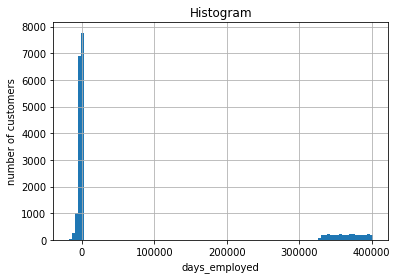

<span style='color:blue'>**DOB_YEARS COLUMN**</span>

,statistics
count,21525.000000
mean,43.293380
std,12.574584
min,0.000000
25%,33.000000
50%,42.000000
75%,53.000000
max,75.000000


,value counts
0,101
19,14
20,51
21,111
22,183
23,254
24,264
25,357
26,408
27,493


<span style='color:blue'>**EDUCATION COLUMN**</span>

,statistics
count,21525
unique,15
top,secondary education
freq,13750


,value counts
BACHELOR'S DEGREE,274
Bachelor's Degree,268
GRADUATE DEGREE,1
Graduate Degree,1
PRIMARY EDUCATION,17
Primary Education,15
SECONDARY EDUCATION,772
SOME COLLEGE,29
Secondary Education,711
Some College,47


<span style='color:blue'>**EDUCATION_ID COLUMN**</span>

,statistics
count,21525.000000
mean,0.817236
std,0.548138
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,4.000000


,value counts
0,5260
1,15233
2,744
3,282
4,6


<span style='color:blue'>**FAMILY_STATUS COLUMN**</span>

,statistics
count,21525
unique,5
top,married
freq,12380


,value counts
civil partnership,4177
divorced,1195
married,12380
unmarried,2813
widow / widower,960


<span style='color:blue'>**FAMILY_STATUS_ID COLUMN**</span>

,statistics
count,21525.000000
mean,0.972544
std,1.420324
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,4.000000


,value counts
0,12380
1,4177
2,960
3,1195
4,2813


<span style='color:blue'>**GENDER COLUMN**</span>

,statistics
count,21525
unique,3
top,F
freq,14236


,value counts
F,14236
M,7288
XNA,1


<span style='color:blue'>**INCOME_TYPE COLUMN**</span>

,statistics
count,21525
unique,8
top,employee
freq,11119


,value counts
business,5085
civil servant,1459
employee,11119
entrepreneur,2
paternity / maternity leave,1
retiree,3856
student,1
unemployed,2


<span style='color:blue'>**DEBT COLUMN**</span>

,statistics
count,21525.000000
mean,0.080883
std,0.272661
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


,value counts
0,19784
1,1741


<span style='color:blue'>**TOTAL_INCOME COLUMN**</span>

,statistics
count,19351.000000
mean,26787.568355
std,16475.450632
min,3306.762000
25%,16488.504500
50%,23202.870000
75%,32549.611000
max,362496.645000


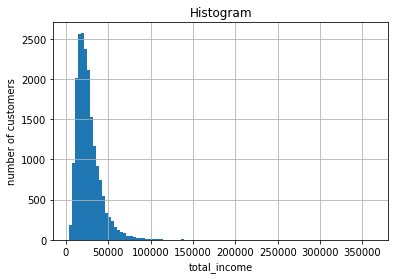

<span style='color:blue'>**PURPOSE COLUMN**</span>

,statistics
count,21525
unique,38
top,wedding ceremony
freq,797


,value counts
building a property,620
building a real estate,626
buy commercial real estate,664
buy real estate,624
buy residential real estate,607
buying a second-hand car,479
buying my own car,505
buying property for renting out,653
car,495
car purchase,462


In [4]:
# Loop over the columns of the DataFrame.
for col in customers_data.columns:
    # Print column name in blue.
    printmd('**{} COLUMN**'.format(str.upper(col)), color= 'blue')
    # Call pandas.DataFrame.describe() method to get the summary statistics.
    # Display returned Series after converting to a DataFrame 
    #               with pandas.Series.to_frame() for better display readability .
    display(customers_data[col].describe().to_frame(name = 'statistics'))
    # Check if column data type is float or not.
    if customers_data[col].dtype != 'float':
        # If column data type is not float, call pandas.Series.value_counts() method for the column.
        # Display returned Series after sorting and converting to a DataFrame for better display readability. 
        # Sorting is with respect to indices in ascending order,
        #                       accomplished via pandas.DataFrame.sort_index() method.
        display(customers_data[col].value_counts().sort_index().to_frame(name= 'value counts'))        
    else:
        # If column data type is float, call pandas.Series.hist() method for the column.
        # Print an empty line to improve readability.
        print()
        # Create a new figure calling the matplotlib.pyplot.figure() method.
        plt.figure()
        # Create a histogram with 100 bins .
        customers_data[col].hist(bins=100)
        # Add a title to plot.
        plt.title('Histogram')
        # Add a label to the x-axis of the plot.
        plt.xlabel("{}".format(col))
        # Add a label to the y-axis of the plot.
        plt.ylabel("number of customers")
        # Show plot.
        plt.show()
    # Print an empty line to improve readability.
    print()
    

Let us present our findings for the ca. $21500$ entries column-by-column: 

- <span style="color:blue">**children:**</span> 
    - This column contains quantitative data about the number of children of customers. 
    - The values in this column are integers in the range $[-1, 20]$. They are stored as integers of type 'int64'. To save memory space, we could use integers of type 'int8' instead. However, since we work with a small dataset, we do not see any harm in using integers of type 'int64'. 
    - The majority of the customers do not have any children. More than $14000$ entries report $0$ children.
    - The number of customers having from $0$ up to $5$ children is rapidly decreasing. We end up with only $9$ customers with $5$ children.
    - There are $76$ entries of customers whose number of children is indicated as $20$. Although having $20$ children is not impossible, see the wikipedia list https://en.wikipedia.org/wiki/List_of_people_with_the_most_children, the correctness of this information is highly doubtful.
    - There are $47$ entries of customers whose number of children is indicated as $-1$, indicating either erroneous or missing data.    
    
- <span style="color:blue">**days_employed:**</span> 
    - This column contains quantitative data about the number of days the customers were already employed. 
    - The data is stored as floating point numbers. Given the column name and description, we would have expected the number of days to be integer valued. Although this may not affect much the analysis, this is inconsistent and changing the type to 'int64' would be appropriate. 
    - There are ca. $2000$ missing values in this column, accounting for about $10\%$ of the column's data. 
    - There are also a lot of entries of customers whose number of days employed is a negative number. Even the median value is negative, thus we know that at least half of the entries are negative.
    - In addition, there are few thousand of unrealistic entries of customers whose number of days employed appears to be more than $300000$ days, corresponding to almost $822$ years. In fact, the mean value of this column is ca. $63000$ days, which corresponds to more than $172$ years. Considering the current human life expectancy, we know that this is impossible. 

- <span style="color:blue">**dob_years:**</span> 
    - This column reports quantitative data about the age of the customers. Here 'dob' stands for 'date of birth'. 
    - There are 101 potential customers whose age information is missing (set to $0$).

- <span style="color:blue">**education:**</span> 
    - This column reports categorical data on the education level of the customers.
    - The following objects of type 'string' are observed throughout the column: "BACHELOR'S DEGREE", "Bachelor's Degree", 'GRADUATE DEGREE', 'Graduate Degree', 'PRIMARY EDUCATION', 'Primary Education', 'SECONDARY EDUCATION', 'SOME COLLEGE', 'Secondary Education', 'Some College', "bachelor's degree", 'graduate degree', 'primary education', 'secondary education', 'some college'.
    - We observe that these strings belong essentially to $5$ categories, even if their names have been typed with different case letters across entries. All entries can be mapped to the following categories: 'primary education', 'secondary education', 'some college', 'bachelor degree', 'graduate degree'. 
    
- <span style="color:blue">**education_id:**</span> 
    - This column contains categorical data which identify the customer’s education level with integers ranging from $0$ to $4$.
    - Data is stored as integers of type 'int64'. Such small integers do not require representation of type 'int64'; integers of type 'int8' would suffice. However, as we do not need to optimize memory usage in this project, we simply keep the data type as it is.  
    - There seems to be a one-to-one correspondance between the levels reported in the 'education' column and the ids reported in this column. Namely, the $5$ id number categories $0$, $1$, $2$, $3$, and $4$ seem to match the 'bachelor degree', 'secondary education', 'some college', 'primary education', and 'graduate degree' levels in the 'education' column, respectively.
    
- <span style="color:blue">**family_status:**</span> 
    - This column reports categorical data about the customer’s marital status with objects of type 'string'. 
    - The $5$ categories are named as 'married', 'civil partnership', 'widow / widower', 'divorced', 'unmarried'. 
    
- <span style="color:blue">**family_status_id:**</span> 
    - This column contains categorical data which identify the customer’s marital status with integers ranging from $0$ to $4$. 
    - Same comment as in the 'education_id' column regarding the type 'int64' applies to this column.
    - There seems to be a one-to-one correspondance between the levels reported in the family_status column and the ids reported in this column. Namely, the $5$ id number categories $0$, $1$, $2$, $3$, and $4$ seem to match the 'married', 'civil partnership', 'widow / widower', 'divorced', and 'unmarried' status in the 'family_status' column, respectively.
    
- <span style="color:blue">**gender:**</span> 
    - This column contains categorical data on the customers' gender identification.
    - There are $3$ categories represented by objects of type 'string': 'F', 'M', and 'XNA'. We expect 'F' to stand for female, 'M' for male, 'XNA' for indeterminate, intersex, or unspecified gender.
    - There is only $1$ customer whose gender is indicated as 'XNA'. Thus, the dataset does not have sufficient data to draw conclusions for the credit worthiness of 'XNA' gendered individuals.
    
- <span style="color:blue">**income_type:**</span> 
    - This column contains categorical data indicating the customer's income type with objects of type 'string'. 
    - There are $8$ categories named as 'employee', 'retiree', 'business', 'civil servant', 'unemployed', 'entrepreneur', 'student', 'paternity / maternity leave'.
    - There are only $6$ customers belonging to the last $4$ categories cited above. Thus, the dataset also lack data representing unemployed people, entrepreneurs, students, and those on paternity or maternity leaves.
    
- <span style="color:blue">**debt:**</span> 
    - This column contains categorical data indicating whether the customer has ever defaulted on a loan using integers of type 'int64'.
    - Data in this column takes only the values $0$ and $1$, where $0$ indicates no debt and $1$ indicates debt. Binary data can be represented with the Boolean data type. However, in Python, 'True' and 'False' are cast implicitly into integers $1$ and $0$, respectively. Thus, we can keep the data type as it is, but we need to interpret the values accordingly. 
        
- <span style="color:blue">**total_income:**</span> 
    - This column contains quantitative data on the monthly income of the customers. 
    - The data is represented with floating point numbers of type 'float64'. This could be the result of averaging the monthly salaries of the customers over different periods. The use of 'float64' data type does not seem to be necessary for analysis, and integers of type 'int64' can be used instead to approximate the data and improve readability. 
    - We have an equal number of missing values in this column as in the 'days_employed' column. We suspect both information might be missing for the same set of customers. 
    
- <span style="color:blue">**purpose:**</span>
    - The final column reports categorical data about the customer's purpose for taking a loan with objects of type 'string'.
    - Although we found that about 40 different strings populate this column, many of them refer to similar purposes, and thus can be regrouped together. Namely, all purposes relate to costs generated either from real estate properties, cars, education, or weddings.

<span style="color:blue">**duplicates:**</span> Although each entry of the dataset contains a unique index, we do not know if each index corresponds to a different customer or not. Even if each index were to correspond to a unique customers, we might still observe duplicated entries because two different customers might have the same profile.
Let us check if raw data have duplicate entries.   

In [5]:
# Identify duplicated entries in DataFrame using pandas.DataFrame.duplicated() method.
duplicated_entries = customers_data.loc[customers_data.duplicated() == True]
# The assignment returns a new DataFrame (copy by value), 
#         as df.loc[mask] returns a new DataFrame with a copy of the data.

# Print the number of duplicated entries.
print('The number of duplicates in raw data is: ', duplicated_entries.shape[0])
# Print the number of customer whose 'debt' field equals 1 among the duplicated entries.
print('Among duplicated entries, the number of debt is: ', duplicated_entries['debt'].sum())


The number of duplicates in raw data is:  54
Among duplicated entries, the number of debt is:  0


We found out that there are 54 duplicated entries in the dataset, none of which corresponds to customers who defaulted on a loan. Note that there could be more duplicates since the education column has some of its categories typed with different case letters, but these weren't taken into account in the above calculations. Since there aren't too many duplicates in raw data, let us display them. 

In [6]:
# Display the duplicated entries.
display(duplicated_entries)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2849,0,NaN,41,secondary education,1,married,0,F,employee,0,NaN,purchase of the house for my family
4182,1,NaN,34,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,NaN,wedding ceremony
4851,0,NaN,60,secondary education,1,civil partnership,1,F,retiree,0,NaN,wedding ceremony
5557,0,NaN,58,secondary education,1,civil partnership,1,F,retiree,0,NaN,to have a wedding
7808,0,NaN,57,secondary education,1,civil partnership,1,F,retiree,0,NaN,having a wedding
8583,0,NaN,58,bachelor's degree,0,unmarried,4,F,retiree,0,NaN,supplementary education
9238,2,NaN,34,secondary education,1,married,0,F,employee,0,NaN,buying property for renting out
9528,0,NaN,66,secondary education,1,widow / widower,2,F,retiree,0,NaN,transactions with my real estate
9627,0,NaN,56,secondary education,1,married,0,F,retiree,0,NaN,transactions with my real estate
10462,0,NaN,62,secondary education,1,married,0,F,retiree,0,NaN,buy commercial real estate


Interestingly, we observe that the values in the 'days_employed' and 'total_income' columns are missing for all these duplicated entries. 

### Conclusion

In this step, we gathered information about the format and content of the bank's cutomer credit worthiness dataset. 
In particular, we looked into various structural and statistical features of the data. 
This helped us identify several issues in the raw data. In summary,
- We saw that the collected quantitative data about the number of days employed, monthly income, and age of the customers contain missing values. While less than $0.5\%$ of the data is missing in the latter case, a non-negligible $10\%$ is missing in the first two cases.
- Beside missing values, we also saw that the data about the number of days employed have negative or unrealisticly large values. We should further investigate if we can make sense of the data in this column beyond our initial observations or consider the data corrupted.
- We observed that the collected categorical string data reporting the education levels and loan purposes of the customers contain redundant representations. While a straightforward case letter adjustment is required to remove the redundancies in the education level data, we should take a closer look into the data about the loan purposes to further group them into similar categories. 
- Regarding the data types, we identified that the floating point data types can be cast into integer data types. But first, the missing values in the corresponding columns have to be filled since the 'NaN' symbols force the column data type to 'float64'. 
- As for the integer valued id columns, we observed that they likely match the string object categories found in the corresponding non-numeric columns, i.e.., 'education' and 'family_status'. Thus, one of the matching columns can be dropped and the lost information can be stored instead as key-value pairs in a small dictionary. We should nevertheless check before proceeding for the presence of inconsistencies or errors in the matching. Similar to the 'education' and 'family_status' columns, an id column can be created for the other categorical data columns of type string, i.e., 'gender', 'income type', 'purpose'. 
- We discovered that certain customers' demographics are very much underrepresented in the dataset. These are XNA gendered customers and those who are entrepreneurs, unemployed, students, or in paternity/maternity leaves.
- Finally, we identified less than 100 duplicated entries in the raw data, which is luckily negligible. The difficulty for duplicated entries stem from the fact that in our dataset these could correspond to two different customers with the exact same demographics and debt information.

This summary, as well as the detailed lists we wrote for each column of the dataset will come handy in the next step of our report, where our goal will be to improve the quality of raw data.

### Step2. Data preprocessing

In this step, we will preprocess the raw data in order to make it ready for analysis. Before we start the preliminary processing of the data to resolve the issues we have identified, it is useful to lay out a strategy. To do so, we will investigate further the dataset and explore the relationships between the columns. We will discuss the potential causes of the issues we have identified in Step1 and justify our remedies.  

First, it is useful to remind the particular questions we will be answering in Step3 of this report. These are:
1. Is there a connection between having kids and repaying a loan on time?
2. Is there a connection between marital status and repaying a loan on time?
3. Is there a connection between income level and repaying a loan on time?
4. How do different loan purposes affect on-time loan repayment?

At this point, we can rush into thinking that we should simply drop some of the columns of our dataset as they do not seem to provide directly relevant information to answer these four questions. Namely, the columns related to the age, gender, or education of the customers may seem not needed at a first glance. Nevertheless, this is not necesserily true. Firstly, some of these columns can, and indeed will be helpful in the data preprocessing steps of the other columns in the dataset. Secondly, dropping columns in advance, we might end up with many duplicated rows such that we are unable to distinguish whether these rows correspond to customers with differing profiles or not. Thridly, we may later want to answer additional questions or compute default rates for groups of customers categorized based on all demographics information collected by the bank. Fourthly, we may be interested applying machine learning techniques to the dataset. So, we will still preprocess the data in each column of our dataset. 

Having said that, we should keep in mind that while some choices we make in the data preprocessing stage can later on impact, and so considerably, the results of a particular analysis, some others may not have any significant impact. Thus, taking note of the limitations and flexibilities of the data at hand with respect to the questions of interest is important. In general, the extent of the impact of our data preprocessing operations to the final analysis can be better judged if we can formulate how we intend to answer the questions beforehand.    

In this project, we will answer the above questions by doing a simple default rate calculation. For each customer demographics we are interested in, we will categorize the customers into groups and calculate what percentage previously defaulted on a loan within each group. Mathematically, we will compute:

$$\begin{equation*}\hbox{ default rate of group}= \frac{\hbox{number of customers in the group who defaulted on a loan}}{\hbox{total size of the group}}.\end{equation*}$$

Using the above formula, we will have a quantitative measure to compare the performances of different groups of customers. 

Now that we have formulated our problem solving approach, we can start working on our data preprocessing strategy.

### Step 2-a. Data preprocessing strategy

Here, we discuss the potential causes of the issues we spotted in raw data and ways to remedy them, all keeping in mind how we intend to answer the questions in Step3. We first proceed column-by-column using the summary lists we built in Step1. Later, we discuss what to do with duplicated entries.

<span style="color:blue">**children:**</span>
Recall from Step1 that we need to decide how to interpret the entries with values $-1$ and $20$ in this column. Let us  discuss some options about how one can proceed with these entries.

- A first option is to replace the entries with other values deemed appropriate.
    1. One possible cause for these errors could be that they are typos. Instead of $1$, the value $-1$ was entered. Instead of $2$, the value $20$ was entered. As a remedy, we can set the values in these entries to $1$ and $2$, respectively.
    2. Another possible cause could be that these entries are not faulty, but have meanings we are unaware of. For instance, $-1$ could have been used on purpose to indicate missing values, or $20$ could have been used to indicate customers with more than $5$ children. When a value is missing, as a basic remedy, we can fill it using some summary statistics, i.e., the mean or median value of the data column. In Step1, we found that the mean of the 'children' column is 0.54, while the median is 0. For this column, choosing the median would be more appropriate, as it is a more robust measure for cases where we have outliers. In such a case, we would be treating the entries filled with $20$ as outliers pulling the mean slightly higher than the median. 
      
Ideally, before deciding, we should check with the data engineers of the bank for this type of troubleshouting. Where did they get the data from, Excel, a databaset, etc.? Do they have a database rule that would prevent the typos with negative values? Do they have a rule for filling in missing values for numeric columns? It is also very likely that the bank would know if they ever had customers with 20 children, given this is a very unexpected event. Here we cannot obtain further information from the bank to help us assess the causes of the errors, so if we decide to fill in these values, we would be relying too much on guesswork. Furthermore, neither of the above two potential causes we discussed seem satisfactory for this column. If they were typos, we would expect them to be randomly occuring. Yet, we are observing only $-1$ as a negative value and $20$ as an unrealistically large value (no $-2$ or no $10$!). Let us also check if these values occur on continuous index slices of the dataframe.

In [7]:
# Display the indices of the entries set to -1 in 'children' column.
print("Indices of entries with 'children' column set to -1:")
display(customers_data[customers_data['children']== -1].index)

# Display the indices of the entries set to 20 in 'children' column.
print("Indices of entries with 'children' column set to 20:")
display(customers_data[customers_data['children']== 20].index)


Indices of entries with 'children' column set to -1:


Int64Index([  291,   705,   742,   800,   941,  1363,  1929,  2073,  3814,
             4201,  4402,  4542,  5272,  6013,  6385,  7190,  7278,  7615,
             7685,  8229,  8251,  8561,  9565,  9574, 10177, 10365, 10918,
            11109, 11268, 11617, 12304, 13786, 14357, 15147, 15435, 16129,
            16265, 17095, 17429, 17657, 18219, 19100, 19366, 19417, 20393,
            20717, 21140],
           dtype='int64')

Indices of entries with 'children' column set to 20:


Int64Index([  606,   720,  1074,  2510,  2941,  3302,  3396,  3671,  3697,
             3735,  3877,  5020,  5315,  5349,  5362,  6198,  6428,  7027,
             7078,  7516,  7789,  7962,  8430,  8883,  8909,  8950,  9889,
            10194, 10377, 10736, 10782, 11449, 11489, 11715, 11937, 12212,
            12226, 12319, 12390, 12534, 12909, 12910, 13256, 13291, 13471,
            13489, 13618, 14355, 14474, 14782, 15313, 15674, 15762, 15812,
            15976, 16371, 16795, 16886, 17093, 17134, 17286, 17509, 18476,
            18493, 18756, 18890, 19271, 19562, 19774, 20038, 20355, 21008,
            21325, 21390, 21404, 21491],
           dtype='int64')

We do not see any pattern in the above slices of data. Unsatisfied with the idea of replacing these values, we ask at this point how much a particular choice have the potential to affect the analysis, in particular the answer to the first question, any significantly. 

For this purpose, let us look at the various populations of customers in this column and identify their sizes, as well as the number of customers who defaulted. 

In [8]:
# Create a new DataFrame including the 'children' and 'debt' columns of the original DataFrame.
# The method pandas.DataFrame.copy() makes a copy of the assigned object's indices and data.
# By default deep=True is set. If deep=False is set, only references to the data and index are copied.
children_copy = customers_data[['children', 'debt']].copy()
# Even if we make changes in the copy, the original DataFrame will not be affected.

# Create a pivot table showing for each unique values in the children column, the number of customers who defaulted.
children_copy_pivot = children_copy.pivot_table(index='children', values='debt', aggfunc='sum')
# Join to the pivot table, a column indicating the total size of each group of cutomers.
children_copy_pivot = children_copy_pivot.join(children_copy['children'].value_counts())
# Rename the columns of the pivot table.
children_copy_pivot.columns = ['debts_total' , 'group_size' ]
# Display the pivot table.
display(children_copy_pivot)


,debts_total,group_size
children,,
-1,1,47
0,1063,14149
1,444,4818
2,194,2055
3,27,330
4,4,41
5,0,9
20,8,76


We note that only $1$ among $47$ customers with entry $-1$ defaulted. That number is $8$ for the $76$ customers with entry $20$. How significant are these population sizes with respect to those we will be computing? Since the first question only asks about the existence or absence of a connection between having kids or not to repaying a loan on time, the specific choice of non-zero values we would potentially decide to fill in would not impact the answer. So, let us group the customers into three groups: those with no children, those with $1$ up to $5$ children, and those with the suspicious entries of $-1$ or $20$.

In [9]:
# Slice the pivot table and print the number of customers and the number of debtors for three groups.
# pandas.DataFrame.iloc[] is a purely integer-location based indexing for selection by position.

# First group is customers with 0 in the 'children' column.
print('Customers without children:')
display(children_copy_pivot.iloc[1])

# Second group is customers with 1 up to 5 in the 'children' column.
print('Customers with 1 up to 5 children:')
# After indexing, the column data in multiples entries are summed with pandas.DataFrame.sum() method.
display(children_copy_pivot.iloc[2:7].sum())

# Third group is customer with -1 or 20 in the 'children' column.
print('Remaining customers with suspicious number of children (-1 and 20):')
display(children_copy_pivot.iloc[[0,7]].sum())


Customers without children:


debts_total     1063
group_size     14149
Name: 0, dtype: int64

Customers with 1 up to 5 children:


debts_total     669
group_size     7253
dtype: int64

Remaining customers with suspicious number of children (-1 and 20):


debts_total      9
group_size     123
dtype: int64

Based on the above numbers, we introduce our second option. 

- The total number of entries we are concerned is $123$, and only $9$ among them defaulted. But a population size of $123$ correspond to less than $1\%$ of the entries of customers without children and to less than and $2\%$ of the entries of customers with $1$ up to $5$ children. Similarly, a size of $9$ cutomers with debts correspond to less than $1\%$ and $2\%$ of the cutomers with debts in the respective two groups of customers without and with children. So, adding amounts from these numbers to the numerator or denumerator of the default rate will have negligible impact on its value. We can thus consider not using these entries at all when answering the first question. 

As a side note, remember that we do not want to drop these columns from the dataset, as we do not want to loose the data in other columns. 

> ❗Based on the above discussion, we decide to leave the 'children' column unprocessed, and intead filter out these rows when calculating the default rate to answer the first question. 

<span style="color:blue">**dob_years:**</span> From Step1, we know that we only have to deal with the $0$ valued entries. As in the 'children' column, we can leave these entries with their current values, given that there are only about $100$ such entries, which would correspond to less than $1\%$ of the data in this column. As opposed to the 'children' column however, here it makes sense to treat these as missing values. 

Let us first look at how many such entries we have for customers from each income type. 

In [10]:
# Display value counts of customers whose 'dob_years' entries are set to 0 for the respective income types.                           
display(customers_data.loc[customers_data['dob_years'] == 0, 'income_type'].value_counts())


employee         55
retiree          20
business         20
civil servant     6
Name: income_type, dtype: int64

To decide on which statistics to choose to fill the missing data, we now compute the mean and median of the remaining customers for each income type. We do not display the results for the 'student', 'unemployed', 'entrepreneur', 'paternity/maternity leave' categories since we do not need them. This is convenient since from Step1 we know that we only had a total of 6 customers with these income types, lacking thus representative summary statistics for these categories. On the other hand, from Step1, we know that we have more than 1000 customers for the income types we need.

In [11]:
# Create a list of income types we want to study.
income_group = ['employee', 'business', 'retiree', 'civil servant']

# Display the mean and median of the age of the customers grouped according to their income types.
# First customers whose 'dob_years' column is set to 0 are filtered out 
#        and only customers whose 'income_type' column returns a value in the income_group list above are included.
# Grouping is performed calling pandas.DataFrame.groupby() method.
# Mean and median of the grouped data is computed via pandas.core.groupby.GroupBy.agg() method.
display(customers_data.loc[(customers_data['dob_years'] != 0) & (customers_data['income_type'].
                            isin(income_group))].groupby('income_type').agg({'dob_years': ['mean', 'median']}))


dob_years       
                    mean median
income_type                    
business       39.854294     39
civil servant  40.804542     40
employee       40.018980     39
retiree        59.370959     60

> ❗We do not observe major differences between the mean and median age in each category, so we suggest to use the mean to fill the missing values. Rounding to the nearest integer, we see that the mean equals $40$ for customers whose income types are 'business' or 'employee', and $41$ for 'civil servants'. As expected, the retired customers are in average much older than the rest, with their mean value at 59 years old. 

<span style="color:blue">**education & education_id:**</span> We treat these two columns jointly since we anticipated in Step1 that a one-to-one correspondance between these columns should exist. We want to check if there are any inconsistent entries across the columns. Once this is done, we can remove the 'education' column from the dataset and save the category names in a small dictionary. 

Before checking, however, we should resolve any other issues we had identified in the entries. Recall from Step1 that we didn't find any missing values, but noticed that the categories in the 'education' column are typed in different case letters across entries. This issue can be remedied by simply changing all entries to strings with lower case letters as follows.

In [12]:
# Create a new DataFrame including the 'education' and 'education_id' columns of the original DataFrame.
# The method pandas.DataFrame.copy() makes a copy of the assigned object's indices and data.
# By default deep=True is set. If deep=False is set, only references to the data and index are copied.
education_copy = customers_data[['education', 'education_id']].copy()
# Even if we make changes in the copy, the original DataFrame will not be affected.

# Convert strings in the 'education' column to lowercase via pandas.Series.str.lower() method.
education_copy['education'] = education_copy['education'].str.lower()
# print the unique values in the 'education' column calling pandas.Series.unique() method.
print(education_copy['education'].unique())


["bachelor's degree" 'secondary education' 'some college'
 'primary education' 'graduate degree']


Now we check if the above list of education levels are mapped to the id numbers 0 to 4, respectively, in the 'education_id'. Note that this is the correspondance we had found out in Step1, but the ids of each level also corresponds to the positional index in the above printed list.

In [13]:
# Create an integer variable called education_id and assign its value to 0.
education_id = 0

# Loop over the unique entries in the 'education' column.
for level in education_copy['education'].unique():
    # Check if all appearances of each unique entry in the 'education' column matches 
    #                  the ones of the corresponding id number in the 'education_id' column.
    # pandas.Series.equal() method is called to test if two objects contain the same elements.
    if (education_copy['education'] == level).equals(education_copy['education_id'] == education_id):
        # Note that the conditions return Boolean Series with value set to True when the condition is met.
        # If condition is met, print that information.
        print("'education' and 'education_id' columns match perfectly for {} category".format(level))
    else:
        # If condition is not met, print that information.
        print("Inconsistency found in 'education' and 'education_id' columns")
    # Increment the education_id variable by 1.
    education_id += 1


'education' and 'education_id' columns match perfectly for bachelor's degree category
'education' and 'education_id' columns match perfectly for secondary education category
'education' and 'education_id' columns match perfectly for some college category
'education' and 'education_id' columns match perfectly for primary education category
'education' and 'education_id' columns match perfectly for graduate degree category


> ❗We have verified that there are no errors in mapping the education levels of the customers in the 'education' column to the correct id numbers in the 'education_id' column. We suggest to save the correspondance in a separate dictionary named 'education_dict' and drop the 'education' column from the dataset.

<span style="color:blue">**family_status & family_status_id:**</span> We also treat these two columns jointly since we also anticipated in Step1 that a one-to-one correspondance between these columns should exist. We want to check if there are any inconsistent entries across the columns and correct them if necessary. For checking, we run code similar to the one we did for the 'education' and 'education_id' columns.

In [14]:
# Create a new DataFrame including the 'family_status' and 'family_status_id' columns of the original DataFrame.
# The method pandas.DataFrame.copy() makes a copy of the assigned object's indices and data.
# By default deep=True is set. If deep=False is set, only references to the data and index are copied.
family_status_copy = customers_data[['family_status', 'family_status_id']].copy()
# Even if we make changes in the copy, the original DataFrame will not be affected.

# Create an integer variable called family_status_id and assign its value to 0.
family_status_id = 0

# Loop over the unique entries in the 'family_status' column.
for status in family_status_copy['family_status'].unique():
    # Check if all appearances of each unique entry in the 'family_status' column matches 
    #                  the ones of the corresponding id number in the 'family_status_id' column.
    # pandas.Series.equal() method is called to test if two objects contain the same elements.
    if (family_status_copy['family_status'] == status).equals(
                 family_status_copy['family_status_id'] == family_status_id):
        # Note that the conditions return Boolean Series with value set to True when the condition is met.
        # If condition is met, print that information.
        print("'family_status' and 'family_status_id' columns match perfectly for {} category".format(status))
    else:
        # If condition is not met, print that information.
        print("Inconsistency found in 'family_status' and 'family_status_id' columns")
    # Increment the family_status_id variable by 1
    family_status_id += 1
    

'family_status' and 'family_status_id' columns match perfectly for married category
'family_status' and 'family_status_id' columns match perfectly for civil partnership category
'family_status' and 'family_status_id' columns match perfectly for widow / widower category
'family_status' and 'family_status_id' columns match perfectly for divorced category
'family_status' and 'family_status_id' columns match perfectly for unmarried category


> ❗ We found no errors in the mapping of the 'family_status' column to to the correct id numbers in the 'family_status_id' column. Thus, the second question inquiring if the customer's marital status have an impact on their debt status can be answered using either column. We suggest to save the correspondance in a separate dictionary named and drop the 'familiy_status' column. 

<span style="color:blue">**days_employed:**</span> In Step1, we observed that the data type in this column should be cast to integers. We also observed that there are several missing values. Before we decide about how to fill these values, let us investigate the other issues we also spotted, namely negative valued and unrealistically large entries. 

Let us first filter out the negative values from the column and check the summary statistics of the remaining data. 

In [15]:
# Display the summary statistics for the 'days_employed' column, after filtering out negative entries.
# pandas.Series.describe() method is called to get the summary statistics.
# Returned Series is printed after converting to a DataFrame for better display readability.
display(customers_data.loc[customers_data['days_employed'] >= 0, 'days_employed'].describe().to_frame())
# Note that we do not need to filter out the missing values since the describe()
#                 function excludes NaN values during summary statistics calculations.                                 


,days_employed
count,3445.000000
mean,365004.309916
std,21075.016396
min,328728.720605
25%,346639.413916
50%,365213.306266
75%,383246.444219
max,401755.400475


We can see that once the negative entries are filtered out, the smallest non-negative entry is larger than $328000$ days (ca. 90 years). Thus, all remaining data consists of outliers. Let us now check the summary statistics for the removed negative entries. 

In [16]:
# Display the summary statistics for the 'days_employed' column, after filtering non-positive entries.
# pandas.Series.describe() method is called to get the summary statistics.
# Returned Series is displayed after converting to a DataFrame with pandas.Series.to_frame() for better readability.
display(customers_data.loc[customers_data['days_employed'] < 0, 'days_employed'].describe().to_frame())
# Note that we do not need to filter out the missing values since the describe()
#                 function excludes NaN values during summary statistics calculations.                                 


,days_employed
count,15906.000000
mean,-2353.015932
std,2304.243851
min,-18388.949901
25%,-3157.480084
50%,-1630.019381
75%,-756.371964
max,-24.141633


We see that, after leaving out the outliers, the number of days a customer has beem employed ranges approximately from $24$ to $18300$ days (ca. 49 years), with an average value around $2300$ days (ca. 6 years). Thus, it looks like due to some technical error, the data was stored with a negative sign in front, except for the outliers. Even though the maximum value is still large, it can correspond to a retired person who started working at a young age. Let us check this.

In [17]:
# Display the entry for the customer having the minimum value in the 'days_employed' column.
# The pandas.Series.idxmin() method is used to find the row label of the minimum value.
# For better display readability, the returned Series is displayed after converting to a DataFrame with 
#        pandas.Series.to_frame() and taking the transpose of that DataFrame calling pandas.DataFrame.transpose().
display(customers_data.loc[customers_data['days_employed'].idxmin()].to_frame().transpose())


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
16335,1,-18388.9,61,secondary education,1,married,0,F,employee,0,29788.6,real estate transactions


Indeed, we found out that the customer who worked almost $50$ years received secondary education and is now retired. So, the customer should have started working as a teenager. Although today starting to work at such an early age is less common, we believe that it used to be more common 50 years ago. Even today, children can enrol in part time jobs or trainings at an early age in some countries and get paid a small stipend. 

Let us also check the customers who started working before they were 15 years old.

In [18]:
# Create a Boolean Series returning the value True when the conditions are met.
# The conditions select entries whose number of days employed is non-positive, and for which 
#        its absolute value is larger than the age of the customer in the 'dob_years' column minus 15 
#        (converted to years by multiplying with 365), filtering out entries where 'dob_years' column is set to 0.
cond = ((customers_data['days_employed'].abs() > ((customers_data['dob_years']-15)*365)) 
                   & (customers_data['dob_years'] != 0) & (customers_data['days_employed'] < 0))

# Create a new DataFrame including the 'family_status' and 'family_status_id' columns of the original DataFrame.
# The method pandas.DataFrame.copy() makes a copy of the assigned object's indices and data.
# By default deep=True is set. If deep=False is set, only references to the data and index are copied.
days_employed_copy = customers_data.loc[cond, ['days_employed', 'dob_years', 'education']].copy()
# Even if we make changes in the copy, the original DataFrame will not be affected.

# Add a new column to the new DataFrame and store the age the customer is expected to have started working.
days_employed_copy['started_work'] = (days_employed_copy['dob_years'] 
                           - (days_employed_copy['days_employed'].abs()/365).astype(int))
# Note that in the above computation, it is assumed that there are 365 possible working days in a year
#           also the absolute value of the 'days_employed' column is taken using the pandas.Series.abs() method.

# Print the number of entries of customers who started working before they were 15 years old.
# The number is computed by calling the first element of the pandas.DataFrame.shape() method
#                              returning a tuple representing the dimensionality of the DataFrame.
print('Number of customers that started working before age 15 is:', days_employed_copy.shape[0])


Number of customers that started working before age 15 is: 44


Since the number of entries is relatively small, let us display the dataset entries we found to check the education level of the customers who started working before they were 15 years old.

In [19]:
# Display the entries of the DataFrame for the customers who started working before they were 15 years old.
# Select all but the 'days_employed' column when displaying the DataFrame for better readability
display(days_employed_copy.loc[:, days_employed_copy.columns != 'days_employed'])


,dob_years,education,started_work
397,46,secondary education,12
714,35,secondary education,15
2492,50,bachelor's degree,13
3417,29,secondary education,14
3645,38,bachelor's degree,15
3957,47,secondary education,14
4299,61,secondary education,13
5230,38,secondary education,15
5581,55,secondary education,14
5708,47,secondary education,11


We can see one more time that the majority of the 44 customers who started working as teenagers hold a secondary education, making it more plausible they started working at a young age. One point to note, however, is that we assumed in our computations a year consists of $365$ working days. Had we considered instead less working days in a year, such as $260$ days, we could have obtained impossible results like customers who started working before they were born. For businesses it is possible to operate $365$ days, while for civil servants this may not be the case.
Unfortunately, we do not know how the bank itself computed the 'days_employed' column. We anticipate the bank converted  months or years of employment into days by multiplying with floating point numbers close to $30$ or $365$, respectively. Knowing how the bank collected this data would have been helpful in further assessing the quality of raw data in the 'days_employed' column, even if this won't affect the analysis in this report as we won't use this data in later analysis. 

Following all this discussion, we are convinced it is reasonable to take the absolute value of the numbers in 'days_employed' column. Now, knowing there are outliers in the data of this column, let us check the summary statistics one more time after the conversion.

In [20]:
# Display the summary statistics for the 'days_employed' column of the original DataFrame, 
#                            after taking its absolute value using the pandas.Series.abs() method.
# pandas.Series.describe() method is called to get the summary statistics.
# Returned Series is displayed after converting to a DataFrame with pandas.Series.to_frame() for better readability.
display(customers_data['days_employed'].abs().describe().to_frame()) 
# Note that we do not need to filter out the missing values since the describe()
#                 function excludes NaN values during summary statistics calculations.                                 


,days_employed
count,19351.000000
mean,66914.728907
std,139030.880527
min,24.141633
25%,927.009265
50%,2194.220567
75%,5537.882441
max,401755.400475


From the summary statistics, we can see that the mean of the 'days_employed' column is more than 30 times larger than the median. This is not a surprise, as we are already aware of the few thousand outliers. Here, we have confirmed that these outliers are pulling significantly the mean towards their huge values. Let us try to see what could be the source of the large valued outliers. For this purpose, we check the income types of the outlier entries, which we identified in the beginning. 

In [21]:
# Display the income types of the customers from the original DataFrame for which 
#                                             the number of 'days_employed' column are non-negative.
display(customers_data.loc[customers_data['days_employed'] >= 0, 'income_type'].value_counts())


retiree       3443
unemployed       2
Name: income_type, dtype: int64

We found out that all the outliers in the 'days_employed' column correspond to customers that are either retired or unemployed. This does not appear to be a coincidence. It is likely that the bank does not care about the number of days retired people or unemployed people were employed in the past. Retired people usually receive a steady montly income from their pension. As for why previous employment may not matter for unemployed customers applying for a loan, we think that unemployed people would only be lended money by a bank, if they are wealthy or have other sources of long term income, such as rent from properties they own. Given that we had identified in Step1 that the entire dataset has only two unemployed customers, no statistically significant results can be derived for customers of this type of income level anyway.

To be consistent with the previous observation, we suggest to fill the missing values, if any, for the cutomers who are retired or unemployed with unrealistically large values as well, say $999000$. Let us check the income types of the customers whose 'days_employed' column is missing.

In [22]:
# Display the number of entries whose 'days_employed' column is missing according to the income types.
# The missing values of the column are detected using pandas.Series.isnull() method.
# The number of entries for the respective income types are counted applying 
#                the pandas.Series.value_counts() method returning a Series containing counts of unique values.
display(customers_data.loc[customers_data['days_employed'].isnull(), 'income_type'].value_counts())


employee         1105
business          508
retiree           413
civil servant     147
entrepreneur        1
Name: income_type, dtype: int64

Indeed, we have $414$ retired or unemployed customer entries to be filled. Now that we understood the origin of the outliers in the data of this column, let us decide how to fill the missing entries for the remaining customers. 
For this purpose, we check the summary statistics of the data from the remaining customers after taking the absolute value of the 'days_employed' column.

In [23]:
# Display the summary statistics for the 'days_employed' column of the original DataFrame, 
#                            after taking its absolute value using the pandas.Series.abs() method 
#                            and filtering out entries for retired and unemployed customers.
# pandas.Series.describe() method is called to get the summary statistics.
# Returned Series is displayed after converting to a DataFrame with pandas.Series.to_frame() for better readability.
display(customers_data.loc[(customers_data['income_type'] != 'unemployed') & 
            (customers_data['income_type'] != 'retiree') , 'days_employed'].abs().describe().to_frame())
# Note that we do not need to filter out the missing values since the describe()
#                 function excludes NaN values during summary statistics calculations.                                 


,days_employed
count,15906.000000
mean,2353.015932
std,2304.243851
min,24.141633
25%,756.371964
50%,1630.019381
75%,3157.480084
max,18388.949901


As expected, the summary statistics are just the postive versions of the summary statistics we got for the negative data, i.e., after filtering out the outliers from original dataset). We see that after removing the outliers, the mean value in this column dropped to about $2353$ days, which is very close to the median value of $2194$ days computed for data with outliers. We could decide to stop here and suggest to fill the missing values with the median value of $2194$ days. However, we would likely end up creating inconsistent data, since we did not take into account one very important factor: the age of the customers. So, with outliers removed in the 'days_employed' column, let us compute the means and counts for the respective ages.

In [24]:
# Create a new DataFrame excluding the entries for retired or unemployed customers from the original DataFrame.
# The method pandas.DataFrame.copy() makes a copy of the assigned object's indices and data.
# By default deep=True is set. If deep=False is set, only references to the data and index are copied.
days_employed_2nd_copy = (customers_data.loc[(customers_data['income_type'] != 'unemployed') & 
                               (customers_data['income_type'] != 'retiree')]).copy()
# Even if we make changes in the copy, the original DataFrame will not be affected.

# Take the absolute value of the 'days_employed' column using the pandas.Series.abs() method.
days_employed_2nd_copy['days_employed'] = days_employed_2nd_copy['days_employed'].abs()

# Set the value of the maximum number of rows that can be displayed to 5000.
pd.set_option('display.max_rows', 5000)
# This is done so that we can scroll through the entire GroupBy object in the output window.
# Display the Groupby object calling the display() method.
display(days_employed_2nd_copy.groupby(['dob_years']).agg({'days_employed': ['mean', 'count']}))


days_employed      
                   mean count
dob_years                    
0           2200.375775    74
19           633.678086    13
20           684.944308    46
21           709.440930    93
22           781.376775   165
23           827.309437   218
24          1026.405485   243
25          1088.406453   334
26          1200.288052   371
27          1358.153479   454
28          1397.672853   445
29          1553.823200   495
30          1696.039355   482
31          1652.717935   494
32          1735.782175   470
33          1868.655183   528
34          1983.724384   531
35          2108.881612   552
36          2272.773915   489
37          2178.934808   479
38          2307.062965   536
39          2406.564360   518
40          2345.284329   536
41          2433.612130   542
42          2793.169884   523
43          2492.648991   454
44          2814.375145   493
45          2791.307088   436
46          2867.112262   414
47          2963.394330   408
48          2898.197374   472
49          3096.942310   428
50          3096.417569   402
51          3050.331333   325
52          3262.730016   336
53          3280.806279   310
54          2979.965858   279
55          3577.539706   233
56          3271.207884   249
57          3436.439512   192
58          3269.127650   197
59          3865.467480   156
60          3789.996829    95
61          4033.667004   103
62          3029.123002    79
63          4385.872648    48
64          4045.360383    49
65          4059.315441    38
66          3899.935741    24
67          3614.078059    19
68          4551.440293    10
69          3775.909777     6
70          4666.178573     8
71          2774.862819     5
72          6603.920060     3
73          3429.205485     1
74          4206.250173     2
75          1678.969771     1

Scanning through the above table and considering rows with more than $100$ counts (to make sure we have 'enough' data), we see that the general median value of $2194$ employed days we had found out is an overestimate for customers below $40$ years old. However, it is sometimes an underestimate and sometimes an overestimate for those older than $40$ years old. Let us repeat the above process by grouping customers into age intervals of $5$ years starting from $19$ years old. Note that above we observe summary statistics for the entries also missing in the 'dob_years' column (where value is set to $0$). However, during actual data preprocessing, we can first fill the missing values of the 'dob_years' column and avoid this problem. Filling missing values on the basis of filled missing values have the risk of propagating innacurate information. However, here we would be doing this for at most $74$ entries, which is less than $0.4\%$ of the data. 

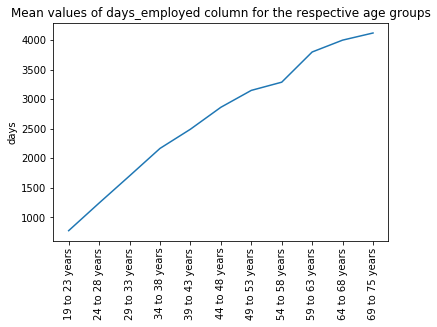

In [25]:
# Compute the sum and count of the number of days customers were employed for their respective ages. 
# Grouping is performed calling pandas.DataFrame.groupby() method.
# Sum and count of the grouped data is computed via pandas.core.groupby.GroupBy.agg() method.
df_dob_grouped = days_employed_2nd_copy.groupby(['dob_years']).agg({'days_employed': ['sum', 'count']})
# Rename the columns for convenience.
# Groupby method returns columns in tuples otherwise, i.e., (days_employed, sum) and (days_employed, count).
df_dob_grouped.columns = ['sum', 'count']

# The following code sums the Groupby object's sum and count columns 5 entries at a time. 
# Exceptions are the first entry (left out) and the last set of entries if less than 
#      5 entries remain (in which case, the sums are added to the sum of the previous 5 entries).
# Create three empty lists.
sum_list = []
count_list = []
age_list = []
# Append the first element to the age_list, i.e., the youngest customers' age.
age_list.append(19)
# Initialize a variable to be used within a for loop.
j = 1
# For loop to iterate over entries of the Groupby object summing 5 entries at a time.
# The number of iterations of the for loop is determined by the range() function, which returns 
#     a sequence of numbers, starting from 0 by default, and incremented by 1 (by default), and stops 
#     before a specified number. The default values can be modified passing arguments as range(start, stop, step).
start = 1
stop = (len(df_dob_grouped) - 1)//5 + 1 # The operator // computes the quotient of division.
step = 1
for i in range(start, stop, step):
    # sum_list is used to store the sums of the 'sum' columns of the Groupby object.
    # Slices of 5 entries are accessed through the pandas.DataFrame.iloc[] method.
    # Elements of the resulting pandas.Series are summed through the pandas.Series.sum() method.
    sum_list.append(df_dob_grouped['sum'].iloc[j:j+5].sum())
    # Similarly count_list is used to store the sums of the 'count' columns of the Groupby object.
    count_list.append(df_dob_grouped['count'].iloc[j:j+5].sum())
    # At the end of each iteration, the location index is shifted by five
    j += 5
    # Keep appending to the age_list the age of the youngest customers in each group.
    age_list.append(age_list[i-1]+5)

# For visuatization purpose, we create strings that tells the ages included in each grouping.
string_age_groups = [] # Initialize the list before for loop
for i in range(len(age_list)-1):
    string_age_groups.append(str(age_list[i]) + ' to ' + str(age_list[i+1]-1) + ' years')
# Python's built-in function len() returns the length (the number of items) of an object.
# Python's built-in function range() returns a sequence of numbers, starting from 0 by default, 
#                            and incremented by 1 (by default), and stops before a specified number. 

# If the Groupby object's length (not counting the first entry at index 0) is not perfectly
#     divisible by 5, append the sum of the last remaining entries to the sum of the previous 5 elements.
remainder = (len(df_dob_grouped) - 1)%5  # The operator % computes the remainder of division.
# Python's built-in function len() returns the length (the number of items) of an object.

# If the remainder of division is not zero, handle remaining elements
if remainder != 0:
    # Add sum of remaining elements in the 'sum' column of the Groupby object 
    #                                             to the last element of the sum_list.
    sum_list[-1] += df_dob_grouped['sum'].iloc[j:j+remainder].sum()
    # Add sum of remaining elements in the 'count' column of the Groupby object 
    #                                           to the last element of the count_list.
    count_list[-1] += df_dob_grouped['count'].iloc[j:j+remainder].sum()
    # Find the age of the oldest customer in the Groupby object.
    oldest = df_dob_grouped.index[-1]
    # Modify the last entry of the list containing the strings that tells which ages are included in each grouping
    string_age_groups[-1] = str(age_list[-remainder]) + ' to ' + str(oldest) + ' years'

# Initialize list to store the resulting mean values of each age groups.
mean_list = []
# Compute the mean values by calling the numpy.divide() method 
mean_list= np.divide(sum_list, count_list)
# For displaying purposes, create a new dataframe from the lists by calling the pandas.DataFrame() constructor
# Python built-in function zip() is used to aggregate the elements from the multiple lists.  
# The zip() function returns a zip object, which is an iterator of tuples where the first item in each 
#    passed iterator is paired together, and then the second item in each passed iterator are paired together etc. 
# Python built-in list() function is used to create a list of tuples from the zip object.
age_mean_count_df = pd.DataFrame(list(zip(string_age_groups, mean_list, count_list))
                                 , columns = ['dob_years_group', 'mean', 'count'])

# Plot the mean values for the respective age groups
# Python's built-in function len() returns the length (the number of items) of an object.
# Python's built-in function range() returns a sequence of numbers, starting from 0 by default, 
#                            and incremented by 1 (by default), and stops before a specified number. 
x = range(len(age_mean_count_df))
y = age_mean_count_df['mean']
fig, ax = plt.subplots(1,1)
ax.plot(x, y)
ax.set_title('Mean values of days_employed column for the respective age groups')
# Set number of ticks for x-axis
ax.set_xticks(x)
# Set ticks labels for x-axis
x_ticks_labels = age_mean_count_df['dob_years_group']
ax.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=10)
# Set label for the y-axis
plt.ylabel('days')
# Show plot
plt.show()


Now, the mean values we computed after grouping the customers into age groups make clearly more sense. In fact, as can be seen from the plot, we observe a linear relationship between customers' ages and number of days they were employed. 

> ❗To sum up, after a long exploration, we suggest to first group the customers with respect to their ages, where each group includes a 5 years interval. We will exclude customers that are retired or unemployed from this grouping. Then, we suggest to take the absolute value of the 'days_employed' column and fill the missing values with the mean value for the respective age groups. For retired or unemployed customers, we suggest fill the missing entries for these income types with the unrealistically large value of $999000$ to be consistent with the original dataset. Once these operations are carried out, we will convert the data type to 'int64'.

<span style="color:blue">**total_income**</span>

In Step1 we had observed that changing the data type in this column to 'int64' would be better. However, as in the case of the ''days_employed' column, we would first need to fill the missing values. Otherwise, the NaN symbols would prevent the data type conversion from 'float64' to 'int64'. 

Let us first check, out of curiosity, whether the data in this column and the 'days_employed' column are missing for the same entries. Recall that we had observed both columns have the same number of missing entries.

In [26]:
# Check whether same entries are missing in the columns 'days_employed' and 'total_income' of the original DataFrame
# pandas.Series.isnull() is used to detect the missing values. 
# pandas.Series.equals() is used to test whether the two pandas.Series objects contain the same elements.
if customers_data['days_employed'].isnull().equals(customers_data['total_income'].isnull()):
    # If condition is met, print that information.
    print("All missing values in the 'days_employed' and 'total_income' columns are found in the same entries.")
else:
    # If condition is not met, print that information.
    print("The missing values in the 'days_employed' and 'total_income' columns are found in different entries.")
    

All missing values in the 'days_employed' and 'total_income' columns are found in the same entries.


Indeed, we see that data in both columns is missing for the same customers. Thus, data might be missing in both columns due to the same reason, even if we do not know why.

Next, let us decide on how to fill the missing entries in this column. In Step1, we observed a relatively smooth histogram of the available data in this column. From the summary statistics, we also found out that the mean and median are in the range of $[23000, 27000]$. So, a first option would be to use one of them to fill in missing values. As the histogram has a long right tail, there are customers who earn significanlty more than the others. In fact, the customer with the maximum income earns approximately an amount of $362500$ monthly, which is certainly an outlier. However, looking at the numbers from Step1, we see that even the customer in the third quartile earns double the amount of the customer in the first quartile, indicating a large disparity between incomes. So, it would be useful to understand what factors affect an individual's monthly income. Then, instead of using a single summary statistic for filling in all of the missing values, we can first group customers into representative categories and fill the missing values in each group with group's summary statistic.

A persons income level might depend on their education level, income type, and age. Ideally, gender should not affect the income level. Unfortunately, it still does in many countries. Let us look at these demographics for customers whose income level is missing.

In [27]:
# Display the number of entries whose 'total_income' column is missing according to 
#                           the income types, education, age, and gender of the customers.
# The missing values of the column are detected using pandas.Series.isnull() method.
# The number of entries for the respective features are counted applying 
#                the pandas.Series.value_counts() method returning a Series containing counts of unique values.
# Displaying is done after sorting (when possible), converting to a DataFrame, 
#                 and for the age feature transposing for easier display readability.
display(customers_data.loc[customers_data['total_income'].isnull(), 'income_type'].value_counts().to_frame())

display(customers_data.loc[customers_data['total_income'].isnull(), 'education_id'].value_counts().to_frame())

display(customers_data.loc[customers_data['total_income'].isnull(), 'dob_years']
        .value_counts().sort_index().to_frame().transpose())

display(customers_data.loc[customers_data['total_income'].isnull(), 'gender'].value_counts().to_frame())


,income_type
employee,1105
business,508
retiree,413
civil servant,147
entrepreneur,1


,education_id
1,1540
0,544
2,69
3,21


,0,19,20,21,22,23,24,25,26,27,...,64,65,66,67,68,69,70,71,72,73
dob_years,10,1,5,18,17,36,21,23,35,36,...,37,20,20,16,9,5,3,5,2,1


,gender
F,1484
M,690


Recall that our dataset does only have two entries for customers who are entrepreneurs. So, we could simply leave out these customers from the analysis when answering the third question. Other than this, we observe that there are missing values in the 'total_income' column for all the four largest catergories of income type, namely 'employee', 'business', 'retiree', 'civil servant'. As for the education levels, missing values do not appear only for customers who received a 'graduate degree'. Finally, missing values appears in the 'total_income' column for customers of all ages and gender, though there are many more female customers whose income level information is missing. 

Let us next explore individually, if the monthly income for the customers in our dataset with available data varies a lot depending on any of these factors. We first look into the categorical data.

In [28]:
# Compute the mean, median, and count of the income level for the respective features.
# Grouping is performed calling pandas.DataFrame.groupby() method.
# Summary statistics of the grouped data is computed via pandas.core.groupby.GroupBy.agg() method.
display(customers_data.loc[(~customers_data['total_income'].isnull()) & (customers_data['income_type']
        .isin(income_group))].groupby(['income_type']).agg({'total_income': ['mean', 'median', 'count']}))

education_group = [0, 1, 2, 3]
display(customers_data.loc[(~customers_data['total_income'].isnull()) & (customers_data['education_id']
            .isin(education_group))].groupby(['education_id']).agg({'total_income': ['mean', 'median', 'count']}))

display(customers_data.loc[(~customers_data['total_income'].isnull()) & (customers_data['gender'] != 'XNA')]
        .groupby(['gender']).agg({'total_income': ['mean', 'median', 'count']}))


total_income                   
                       mean      median  count
income_type                                   
business       32386.793835  27577.2720   4577
civil servant  27343.729582  24071.6695   1312
employee       25820.841683  22815.1035  10014
retiree        21940.394503  18962.3180   3443

total_income                  
                      mean     median  count
education_id                                
0             33142.802434  28054.531   4716
1             24594.503037  21836.583  13693
2             29045.443644  25618.464    675
3             21144.882211  18741.976    261

total_income                  
                mean     median  count
gender                                
F       24655.604757  21464.845  12752
M       30907.144369  26834.295   6598

We see that the average monthly income of customers (mean) and the monthly income of the average cutomer (median) are both increasing with respect to income types in the following order: 'retiree', 'employee', 'civil servant', and 'business'. A similar trend is observed as the education level is increasing from primary education towards bachelors' degree, and as gender transitions from female to male customers. In all cases, the mean is slightly larger than the median. Let us plot a boxplot for each categories to check for outliers. 

In [29]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

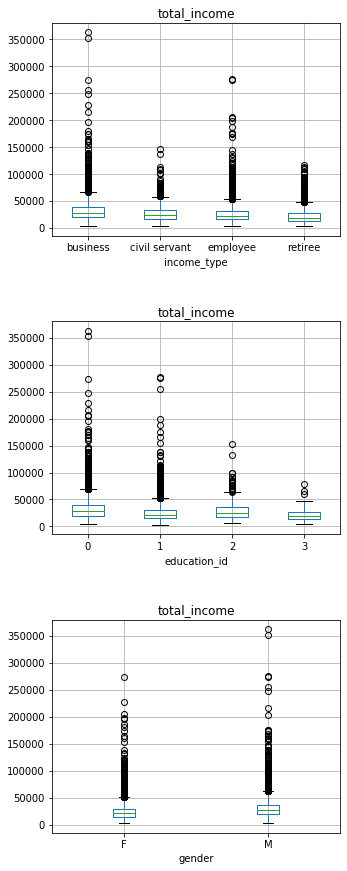

In [30]:
# Create Figure and axes.Axes objects of 3 subplots aligned vertically.
# Set the size of the figure with figsize argument.
fig, axes = plt.subplots(3, 1, figsize=(5,15))

# Create boxplots of the 'total_income' column for the respective features 
#                        by filtering out missing data and only for feature categories of interest.
# Assign the boxplot's axis to the desired elements of the axes array. 
customers_data.loc[(~customers_data['total_income'].isnull()) & (customers_data['income_type']
                                 .isin(income_group))].boxplot(column = 'total_income', by='income_type', ax=axes[0])


customers_data.loc[(~customers_data['total_income'].isnull()) & (customers_data['education_id']
                              .isin(education_group))].boxplot(column = 'total_income', by='education_id', ax=axes[1])

customers_data.loc[(~customers_data['total_income'].isnull()) & 
                     (customers_data['gender'] != 'XNA')].boxplot(column = 'total_income', by='gender', ax=axes[2])


# Adjust spacing between the subplots
plt.subplots_adjust(hspace = 0.4)
# Remove the title from the Boxplots
plt.suptitle('')
# Display the plots
plt.show()


From the boxplots, we do observe outliers for each category. Thus, were we to fill in the missing values in the 'total_income' column based on either the income type, education level, or gender of the customers, it would be appropriate to use the median values. 

Next we continue with the quantitative age data to see how the monthly income of customers is affected by.

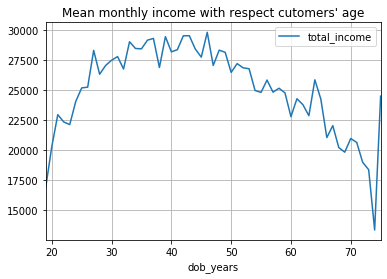

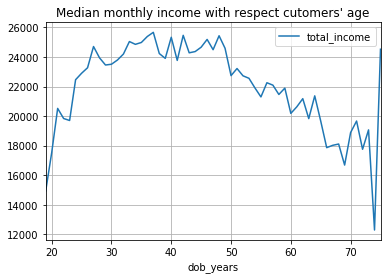

In [31]:
# Create two pivots tables showing for each customer age (except missing values in 'dob_years' column),
#                                                      the mean and median of the customers' income levels.
# Create line plots from the pivot tables
(customers_data.loc[(~customers_data['total_income'].isnull()) & (customers_data['dob_years'] != 0)]
    .pivot_table(index='dob_years', values = 'total_income', aggfunc= 'mean')
    .plot(grid=True, legend = "mean 'total_income'",title = "Mean monthly income with respect cutomers' age"))

(customers_data.loc[(~customers_data['total_income'].isnull()) & (customers_data['dob_years'] != 0)]
    .pivot_table(index='dob_years', values = 'total_income', aggfunc= 'median')
    .plot(grid=True,  legend = "median 'total_income'", title = "Median monthly income with respect cutomers' age"))


We can see that customers younger than 30 years old and older than 50 years old are on average earning less. As cutomers move from their 50s into their 60s and 70s they keep earning on average less.  Thus, we can group the customers into 3 groups and generate monthly income statistics by age groups. To decide, let us check the summary statistics of the 'dob_years' column, filtering out missing entries in there and the 'total_income' column.

In [32]:
# Compute and display summary statisticsfiltering out missing entries in the 'dob_years' and 'total_income' columns.
display(customers_data.loc[(~customers_data['total_income'].isnull()) & (customers_data['dob_years'] != 0),
                   'dob_years'].describe().to_frame())


,dob_years
count,19260.000000
mean,43.459709
std,12.251560
min,19.000000
25%,33.000000
50%,43.000000
75%,53.000000
max,75.000000


Based on the above table, we decide to group cutomers into three age groups. We select the thresholds as the first and third quartiles, i.e., 33 and 53, respectively. We can name the groups as 'young', 'senior', 'fellow'. Once grouped, let us compute the summary statistics for each age group and check for outliers via boxplots. 

total_income                  
                   mean      median count
age_group                                
fellow     24325.362341  21020.2380  5141
senior     28376.145188  24617.0360  9785
young      26152.184158  23142.4595  4334

<Figure size 360x360 with 0 Axes>

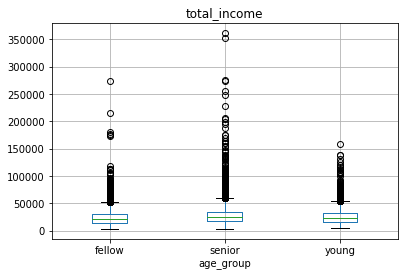

In [33]:
# Define a function taking as argument the age of the customers and returning the age group
def age_group(age):
    """
    The function returns the age group according to the age value, using the following rules:
    —'young' for age <= 32
    —'senior' for 33 <= age <= 52
    —'fellow' for all other cases
    """
    
    if age <= 32:
        return 'young'
    if age <= 52:
        return 'senior'
    return 'fellow' 

# Create a new DataFrame excluding missing values in the 'total_income' and 'dob_years' columns
# The method pandas.DataFrame.copy() makes a copy of the assigned object's indices and data.
# By default deep=True is set. If deep=False is set, only references to the data and index are copied
income_info_copy = customers_data.loc[(~customers_data['total_income'].isnull()) 
                                      & (customers_data['dob_years'] != 0)].copy()
# Even if we make changes in the copy, the original DataFrame will not be affected

# Apply the age_group() function to the 'dob_years' column of the DataFrame calling pandas.Series.apply() method
income_info_copy['age_group'] = income_info_copy['dob_years'].apply(age_group)

# Compute the mean, median, and count of the income level for the respective age_groups.
# Grouping is performed calling pandas.DataFrame.groupby() method.
# Summary statistics of the grouped data is computed via pandas.core.groupby.GroupBy.agg() method.
display(income_info_copy.groupby(['age_group']).agg({'total_income': ['mean', 'median', 'count']}))

# Create a figure object and set the size of the figure with figsize argument.
fig = plt.figure(figsize=(5,5))
# Create a boxplot of the 'total_income' column for the respective age_groups 
income_info_copy.boxplot(column = 'total_income', by='age_group')
# Remove the title from the Boxplots
plt.suptitle('')
# Display the plots
plt.show()


From the boxplots, we observe that there are outliers within each age group. Thus, were we to fill in the missing values in the 'total_income' column based on the age group of the customers, it would also be appropriate to use the median value as in the case of the other three columns. 

Finally, let us group the customers according to all four features, and compute the groups' summary statistics.

In [34]:
# Filter the Dataframe to include only customer profiles of interest.
income_info_copy = income_info_copy.loc[(customers_data['income_type'].isin(income_group)) 
                                        & (customers_data['gender'] != 'XNA')]

# Apply the age_group() function to the 'dob_years' column of the DataFrame calling pandas.Series.apply() method.
income_info_copy['age_group'] = income_info_copy['dob_years'].apply(age_group)

# Create another new DataFrame including the rows with missing values in the 'total_income' column
#                                   but excluding the rows with missing values in the 'dob_years' column.
# The method pandas.DataFrame.copy() makes a copy of the assigned object's indices and data.
# By default deep=True is set. If deep=False is set, only references to the data and index are copied.
income_info_2nd_copy = customers_data.loc[(customers_data['total_income'].isnull()) &
                                                    (customers_data['dob_years'] != 0)].copy()
# Even if we make changes in the copy, the original DataFrame will not be affected.

# Set the missing values to zero.
income_info_2nd_copy['total_income'] = 0 
# Apply the age_group() function to the 'dob_years' column of the DataFrame calling pandas.Series.apply() method.
income_info_2nd_copy['age_group'] = income_info_2nd_copy['dob_years'].apply(age_group)


# Compute the mean, median, and count of the income level for the respective feature groups.
# Grouping is performed calling pandas.DataFrame.groupby() method.
# Summary statistics of the grouped data is computed via pandas.core.groupby.GroupBy.agg() method.
income_groupby_1 = (income_info_copy.groupby(['income_type', 'education_id', 'age_group', 'gender'])
                    .agg({'total_income': ['mean', 'median', 'count']}))

# Compute the count of the income level for the respective feature groups.
# Here we check for how many customers in each feature group the values are missing in the 'total_income' columns.
income_groupby_2 = (income_info_2nd_copy.groupby(['income_type', 'education_id', 'age_group', 'gender'])
        .agg({'total_income': ['count']}))

# Add the missing values count to the Groupby object containing the summary statistics.
income_groupby_1[('total_income', 'missing values count')] = income_groupby_2[('total_income', 'count')]

# Display the Groupby object.
display(income_groupby_1)


total_income                    \
                                                     mean      median count   
income_type   education_id age_group gender                                   
business      0            fellow    F       39126.001673  31169.0070   107   
                                     M       45638.582380  39140.0740    79   
                           senior    F       36161.822653  31402.1295   596   
                                     M       49852.677305  39480.4560   298   
                           young     F       31232.556994  27046.0150   325   
                                     M       39820.341560  33536.5530   184   
              1            fellow    F       27714.771905  23795.0765   252   
                                     M       29542.944000  27589.1460   148   
                           senior    F       26594.232710  23915.4510  1055   
                                     M       34634.346019  29713.8680   619   
                           young     F       23286.510669  21058.6650   347   
                                     M       31155.903193  28125.3970   259   
              2            fellow    F       29961.660286  31081.2640     7   
                                     M       30205.821000  24305.6100     3   
                           senior    F       37091.198785  31735.6580    65   
                                     M       36783.825714  34657.8350    35   
                           young     F       25448.506811  22417.9980    90   
                                     M       32202.248550  29167.7135    60   
              3            fellow    F       15518.346000  15518.3460     1   
                                     M       39033.628000  39033.6280     1   
                           senior    F       26267.593600  24685.5095    10   
                                     M       25937.613125  24016.1540     8   
                           young     F       19984.741000  19984.7410     2   
                                     M       28738.046571  21301.3680     7   
civil servant 0            fellow    F       31651.521591  26895.6220    44   
                                     M       35944.332929  31798.5830    14   
                           senior    F       29432.738005  25951.8760   197   
                                     M       45551.098441  37613.8930    68   
                           young     F       25766.944278  23179.1120   115   
                                     M       33658.192065  33050.4235    46   
              1            fellow    F       23438.631398  21864.4750   103   
                                     M       28249.332238  25634.7090    21   
                           senior    F       23160.508477  19825.3150   377   
                                     M       30762.766605  27440.0360   119   
                           young     F       20449.522663  18021.2570    92   
                                     M       29575.306789  27526.4380    57   
              2            senior    F       29495.201583  26502.3705    12   
                                     M       41234.879571  37303.7910     7   
                           young     F       19864.141071  17087.4970    14   
                                     M       26826.602154  25543.6760    13   
              3            fellow    F       16922.625000  16922.6250     1   
                                     M        8495.926000   8495.9260     1   
                           senior    F       11755.443000  11755.4430     1   
                                     M       54478.361500  54478.3615     2   
                           young     M       30563.383000  30563.3830     1   
              4            senior    F       17822.757000  17822.7570     1   
employee      0            fellow    F       30617.796343  27598.9845   140   
                                     M       35882.914247  31382.8530    85   
                

One problem with the grouping based on multiple features is that we only have few samples of customers that belong to some of the groups. Although we observe from the fourth data column above that some of the missing values belong to those groups, the number of missing values to be filled is also very few in these groups. Thus, we believe it would be  adequate to fill the missing values in each group with the median value of the group. 

Finally, recall that we need to investigate the impact of the income level on repaying a loan on time to answer the third question. Thus, after filling the missing data, we further need to group customers into various income levels. We need to decide what thresholds use for grouping. The World Bank divides the world's economies into four income groups: low income, lower-middle income, upper-middle income, and high income. See, for instance https://blogs.worldbank.org/opendata/new-country-classifications-income-level-2019-2020. Thresholds are also provided to classify individuals. However, in this project we do not have information about the currency. Therefore, we will group based on data and use quantiles as thresholds. Let us remind ourselves of these statistics.

In [35]:
# Call pandas.DataFrame.describe() method to get the summary statistics.
# Display returned Series after converting to a DataFrame 
#               with pandas.Series.to_frame() for better display readability .
display(customers_data['total_income'].describe().to_frame())


,total_income
count,19351.000000
mean,26787.568355
std,16475.450632
min,3306.762000
25%,16488.504500
50%,23202.870000
75%,32549.611000
max,362496.645000


> ❗To sum up, we suggest to fill the missing values by using the median value of the income level of the customers when grouped according to their income types, education levels, age groups, and gender. To do so, we will first need to add a new 'age_group' column to to the dataset grouping the customers as 'young' (younger than 33 years old), 'senior', and 'fellow' (older than 53 years old). We can then proceed with changing the data type of this column to integers of type 'int64'. Subsequently, we need to create a new ''income_group' column to categorize customers according to their income levels. In particular, we suggest to group data in 'low income', 'lower-middle income', 'upper-middle income', and 'high income' groups separated with the threshold values given by the quartiles, respectively.

<span style="color:blue">**purpose:**</span> In Step1, we observed that there are around 40 unique entries populating this column, yet many of them actually refer to a same or very similar purpose. Thus, we can group these entries into fewer categories. Technically, we can use stemming or lemmatization libraries. However, given the relatively small number of unique entries, we find it more convenient here to group them manually. Let us remind ourselves, the list of unique entries in the purpose column.

In [36]:
# print the unique values in the 'purpose' column calling pandas.Series.unique() method.
print(customers_data['purpose'].unique())


['purchase of the house' 'car purchase' 'supplementary education'
 'to have a wedding' 'housing transactions' 'education' 'having a wedding'
 'purchase of the house for my family' 'buy real estate'
 'buy commercial real estate' 'buy residential real estate'
 'construction of own property' 'property' 'building a property'
 'buying a second-hand car' 'buying my own car'
 'transactions with commercial real estate' 'building a real estate'
 'housing' 'transactions with my real estate' 'cars' 'to become educated'
 'second-hand car purchase' 'getting an education' 'car'
 'wedding ceremony' 'to get a supplementary education'
 'purchase of my own house' 'real estate transactions'
 'getting higher education' 'to own a car' 'purchase of a car'
 'profile education' 'university education'
 'buying property for renting out' 'to buy a car' 'housing renovation'
 'going to university']


Scanning the above list, it is easy to see that all credit purposes relate to costs from either real estate properties, cars, education, or weddings. Nonetheless, we observe that the unique entries within the group related to real estate property costs cover a relatively broad range of purposes under its umbrella. Ideally, we could check with the bank's business unit to request more information about the credit requirements and amounts for each of the stated entries. Here, as we have limited knowledge, let us simply start by assigning the entries above into the 4 categories. 

> ❗We suggest to create a new column in our dataset called 'purpose_group', which we will fill by mapping each entry of the 'purpose' column to its pre-defined category, i.e., 'real_estate', 'car', 'education', or 'wedding'. We also suggest to create the 'purpose_id' and 'purpose_group_id' columns to map the string categories to integer ids. We will save the correspondances in separate dictionaries named 'purpose_dict' and 'purpose_group_dict' and drop the 'purpose' and 'purpose group' columns from the dataset afterwards.

<span style="color:blue">**duplicated entries:**</span> Based on the data preprocessing strategy we built so far, there is only one operation that has the potential of increasing the number of duplicated entries in our dataset. It is the mapping of the education column into lower case letters. Recall that the column in the original dataset contains identical strings case typed differently across entries. Let us check have many more duplicates we obtain after the conversion.

In [37]:
# Create a new DataFrame excluding missing values in the 'total_income' and 'dob_years' columns
# The method pandas.DataFrame.copy() makes a copy of the assigned object's indices and data.
# By default deep=True is set. If deep=False is set, only references to the data and index are copied
duplicate_check_copy = customers_data.copy()
# Even if we make changes in the copy, the original DataFrame will not be affected

# Convert strings in the 'education' column to lowercase via pandas.Series.str.lower() method.
duplicate_check_copy['education'] = education_copy['education'].str.lower()

# Identify duplicated entries in DataFrame using pandas.DataFrame.duplicated() method
duplicated_entries_new = duplicate_check_copy.loc[duplicate_check_copy.duplicated() == True]
# The assignment returns a new DataFrame (copy by value), 
#         as df.loc[mask] returns a new DataFrame with a copy of the data.

# Print the number of duplicated entries.
print('The number of duplicates in preprocessed data is: ', duplicated_entries_new.shape[0])
# Print the number of customer whose 'debt' field equals 1 among the duplicated entries.
print('Among duplicated entries, the number of debt is: ', duplicated_entries_new['debt'].sum())


The number of duplicates in preprocessed data is:  71
Among duplicated entries, the number of debt is:  0


We found that the number of duplicated entries rise from 54 to 71 after preprocessing the 'education' column. Neither the increase, nor the overall number is significant relative to the total number of entries. As we had already mentioned in Step1, one difficulty related to the duplicated entries in our dataset is that we do not know if they correspond to different customers or not. Thus, by removing them, we could be loosing information. On the other hand, even if some of the duplicated entries were to correspond to different customers, this would create some bias in our customers sample. For the sake of the current analysis, we think it is safer to remove the few duplicated entries before drawing conclusions in Step3.

> ❗Thus, we suggest to drop the duplicated entries which account to about $0.33\%$ of the overall data.

### Conclusion

In this subsection, we presented potential causes and remedies for the issues we spotted in raw data. In particular, we looked at the missing values and anomalies in data, we tried to understand if there might be in reality meaningful information behind these, we discussed whether to replace, remove, or leave them as they are, we computed summary statistics using various customer demographics, and we checked for outliers to decide which summary statistic is more appropriate to be used when replacing data values. In addition, we double checked the correspondances between the integer id columns and their string counterparts. Finally, we also identified categories to group the data. 

We found out there were more significant issues in the quantitative columns of the raw data. In particular, 
the quality of the raw data was worst for the 'days_employed' column. Nevertheless, we managed to identify
steps to improve the quality of data and discussed the significance of our choice with respect to the question we 
will be answering in Step3.

On the other hand, for the categorical data, we decided to store all categories as ids, similar to the 'education_id' 
column. This will require us to create dictionaries mapping the categories to ids.

Overall, starting from the information gathered in Step1, we built our data preprocessing strategy to improve the quality of raw data and ended up with the following set of tasks: 

* <span style="color:blue">**Processing missing values**</span> 
    * Task: Fill $0$'s in the 'dob_years' column with the the mean for the respective income types. As a result the counts for 40, 41, and 59 years old customers will change only by 75, 6, and 20, respectively.
    * Task: Take first the absolute value of the 'days_employed' column. Group the customers with respect to their ages, where each group includes a 5 years interval, excluding customers that are retired or unemployed from this grouping. Fill the missing values with the median value for the respective age groups. For retired or unemployed customers, fill the missing with the unrealistically large value of $999000$.
    * Task: Create an 'age_group' column in the dataset to map the 'dob_years' column into three age groups. Call the groups as 'young', 'senior', and 'fellow'. Select the thresholds as the first and third quartiles of 'dob_years' column (33 and 53), filtering out entries where customer's age or income level information is missing. Fill the missing values of the 'total_income' column by using the group median value of the income level when the customers are grouped according to their income types, education levels, age groups, and gender. 
* <span style="color:blue">**Replacing data types:**</span> Once the missing values will be replaced, we will proceed by changing the data types in some columns.
    * Task: Cast the floating numbers in the 'days_employed' column into the nearest integers of type 'int64'.
    * Task: Repeat previous task for the 'total_income' column. 
* <span style="color:blue">**Processing duplicates:**</span> 
    * Task: Treat the 'education' column as a duplicate of the 'education_id' column. Store the 5 categories in a dictionary and drop the 'education' column
    * Task: Repeat previous task for the 'family_status' and 'family_status_id' columns. 
    * Task: Add to the dataset id columns for all the other categorical data columns: 'gender_id', 'purpose_id', 'income_type_id'. Store the correspondances in separate dictionaries and drop the non-numeric categorical data columns.
    * Task: Drop the 71 duplicated rows from the dataset.
* <span style="color:blue">**Categorizing data:**</span> We will proceed by categorizing data as follows:
    * Task Categorize the income level into $4$ categories as 'low income', 'lower-middle income', 'upper-middle income', and 'high income'. The groups will be separated with the threshold values of  (16489 ,  23203 , and  32550). Add a new column 'income_level_id' to map the 'total_income' column into the $4$ categories using the id numbers of each category. Store the category names of the ids in separate dictionaries.
    *
    * Task: Add the 'purpose_group_id' column to the dataset to map the 'purpose_id' column into pre-defined $4$ categories. Manually group unique entries of the 'purpose' column to the appropriate category $0$ will refer to real_estate, $1$ to car, $2$ to education, and $3$ to wedding related purposes.

Now that we have a clear roadmap, we can proceed with the actual preprocessing of the raw data.

In [38]:
# Create a copy of the cutomers_data dataframe to carry the data preprocessing tasks. 
customers_data_cleaned = customers_data.copy()


### Step 2-b. Processing missing values

In [39]:
#### Task 1 ####
# Fill $0$'s in the 'dob_years' column with the the mean for the respective income types using the transform method
#### ###### ####

# Replace 0s in the 'dob_years' column with NaNs to avoid them entering the mean computation in the next step
customers_data_cleaned['dob_years'].replace({0: np.nan}, inplace=True) # Integer data is cast to floating points
# Call the pandas.core.groupby.DataFrameGroupBy.transform() method passing as argument each groups' mean 
customers_data_cleaned['dob_years'] = (customers_data_cleaned.groupby('income_type')['dob_years'].
                                     transform(lambda grp: grp.fillna(grp.mean())).round(0).astype('int64'))
# The floating point group means are rounded to the nearest integers pandas.Series.round() method
# The column is cast back to integers after filling via pandas.Series.astype() method.


In [40]:
#### Task 2 ####
# Fill missing values in the 'days_employed' columns
# Take first the absolute value of the 'days_employed' column. Group the customers 
# with respect to their ages, where each group includes a 5 years interval, excluding customers 
# that are retired or unemployed from this grouping. Fill the missing values with the mean value 
# for the respective age groups. For retired or unemployed customers, fill the missing with 
#  the unrealistically large value of $999000$.
#### ###### ####

# Take absolute value of the column
customers_data_cleaned['days_employed'] = customers_data_cleaned['days_employed'].abs()

# Define a function that decides which age group the customer belongs to 
def fill_days_employed(age):
    """
    The function returns the index of the group according to the age value, using the following rules:
    — first group with index 0 is for 19 <= age <= 23
    — groups with index from 1 to 9 continues adding up 5 years to the previous index
    — last group with id 10 is for  age >= 69 
    """
    if age >= 69:
        return 10
    if age >= 64:
        return 9
    if age >= 59:
        return 8
    if age >= 54:
        return 7
    if age >= 49:
        return 6
    if age >= 44:
        return 5
    if age >= 39:
        return 4
    if age >= 34:
        return 3
    if age >= 29:
        return 2
    if age >= 24:
        return 1
    if age >= 19:
        return 0
    
# Compute the sum and count of the number of days customers were employed for their respective ages. 
# Grouping is performed calling pandas.DataFrame.groupby() method.
# Sum and count of the grouped data is computed via pandas.core.groupby.GroupBy.agg() method.

cd_cleaned_dob_grouped = (customers_data_cleaned.loc[~customers_data_cleaned['income_type']
                .isin(['retiree', 'unemployed'])].groupby(['dob_years']).agg({'days_employed': ['sum', 'count']}))
# Rename the columns for convenience.
# Groupby method returns columns in tuples otherwise, i.e., (days_employed, sum) and (days_employed, count).
cd_cleaned_dob_grouped.columns = ['sum', 'count']

# The following code sums the Groupby object's sum and count columns 5 entries at a time. 
# Exceptions are the first entry (left out) and the last set of entries if less than 
#      5 entries remain (in which case, the sums are added to the sum of the previous 5 entries).
# Create three empty lists.
sum_list = []
count_list = []
mean_list = []
# Initialize a variable to be used within a for loop.
j = 0
# For loop to iterate over entries of the Groupby object summing 5 entries at a time.
# The number of iterations of the for loop is determined by the range() function, which returns 
#     a sequence of numbers, starting from 0 by default, and incremented by 1 (by default), and stops 
#     before a specified number. The default values can be modified passing arguments as range(start, stop, step).
start = 1
stop = len(cd_cleaned_dob_grouped)//5 + 1 # The operator // computes the quotient of division.
step = 1
for i in range(start, stop, step):
    # sum_list is used to store the sums of the 'sum' columns of the Groupby object.
    # Slices of 5 entries are accessed through the pandas.DataFrame.iloc[] method.
    # Elements of the resulting pandas.Series are summed through the pandas.Series.sum() method.
    sum_list.append(cd_cleaned_dob_grouped['sum'].iloc[j:j+5].sum())
    # Similarly count_list is used to store the sums of the 'count' columns of the Groupby object.
    count_list.append(cd_cleaned_dob_grouped['count'].iloc[j:j+5].sum())
    # At the end of each iteration, the location index is shifted by five
    j += 5

# If the Groupby object's length (not counting the first entry at index 0) is not perfectly
#     divisible by 5, append the sum of the last remaining entries to the sum of the previous 5 elements.
remainder = len(cd_cleaned_dob_grouped)%5  # The operator % computes the remainder of division.
# Python's built-in function len() returns the length (the number of items) of an object.

# If the remainder of division is not zero, handle remaining elements
if remainder != 0:
    # Add sum of remaining elements in the 'sum' column of the Groupby object 
    #                                             to the last element of the sum_list.
    sum_list[-1] += cd_cleaned_dob_grouped['sum'].iloc[j:j+remainder].sum()
    # Add sum of remaining elements in the 'count' column of the Groupby object 
    #                                           to the last element of the count_list.
    count_list[-1] += cd_cleaned_dob_grouped['count'].iloc[j:j+remainder].sum()
    # Find the age of the oldest customer in the Groupby object.

# Compute the mean values by calling the numpy.divide() method 
mean_list= np.divide(sum_list, count_list)

customers_data_cleaned['days_employed'] = customers_data_cleaned.apply(
    lambda row: 999000 if pd.isnull(row['days_employed']) and row['income_type'] in ['retiree', 'unemployed']
    else mean_list[fill_days_employed(row['dob_years'])] if pd.isnull(row['days_employed']) 
    else row['days_employed'], axis=1)                                           
                                           

In [41]:
#### Task 3 ####
# Create an 'age_group_id' column in the dataset to map the 'dob_years' column into three age groups. 
# The groups names are 'young', 'senior', and 'fellow' with ids from $0$ to $2$, respectively. 
# Select the thresholds from the original datasetas the first and third quartile of 'dob_years' column, 
#                         filtering out entries where customer's age or income level information is missing.
#### ###### ####

# Assign the first and third quartile from describe() method
age_thresholds = customers_data.loc[(~customers_data['total_income'].isnull()) & (customers_data['dob_years'] != 0),
                  'dob_years'].describe()[['25%', '75%']]

# Define a function to categorize customer's into age groups
def fill_income_level(age):
    """
    The function returns the age group id according to the age value, using the following rules:
    — 0 for young: age < first quartile
    — 1 for senior: 33 <= age < third quartile
    — 2 for fellow: all other cases
    """
    if age < age_thresholds[0]:
        return 0 # young
    if age < age_thresholds[1]:
        return 1 # senior
    return 2 #fellow 

customers_data_cleaned['age_group_id'] = customers_data_cleaned['dob_years'].apply(fill_income_level)

# Fill the missing values by using the group median value of the income level 
# when the customers are grouped according to their income types, education levels, and age groups. 


customers_data_cleaned['total_income'] = (customers_data_cleaned
                                          .groupby(['education_id', 'age_group_id'])['total_income']
                                          .transform(lambda grp: grp.fillna(grp.median())))

#Sanity checks
customers_data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
children            21525 non-null int64
days_employed       21525 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
age_group_id        21525 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 2.1+ MB


### Conclusion

In this step we filled missing data in three quantitative columns of the dataset. Namely, 'dob_years', 'days_employed', and 'total_income'. As the percentages of missing data in the latter two columns were relatively significant, accounting to $10\%$ of the original data in both cases, we proceeded with the awareness that our choices can influence the default rate calculations in general, though in this project, we will only compute the default rates for the income levels of the customers. 

Building our strategy, we had identified which other customer's demographics 
potentially influence the data in any of these given columns. Thus, instead of using summary statistics simply generated from the entire column data, we first grouped the customers with similar profiles together, and then generated groupsstatistics from the available data. In this way, we believe that we filled the missing values in any of the given columns with more realistic summary statistics.  

One of the preprocessing tasks required us to add a new column to the dataset, which categorized each customer as a young, senior, or fellow professional depending only on their ages. 


### Step 2-c. Data type replacement

In [42]:
#### Task 4 ####
# Cast 'days_employed' data type to 'int64'
#### ###### ####
# First round the floating points to the nearest integers calling pandas.Series.round() method with argument 0.
# The method rounds each value in a Series to the given number of decimals.
# Then, convert the rounded floating point numbers to integers using pandas.Series.astype() method
customers_data_cleaned['days_employed'] = customers_data_cleaned['days_employed'].round(0).astype('int64')

#### Task 5 ####
# Cast 'total_income' data type to 'int64'
#### ###### ####
# First round the floating points to the nearest integers calling pandas.Series.round() method with argument 0.
# The method rounds each value in a Series to the given number of decimals.
# Then, convert the rounded floating point numbers to integers using pandas.Series.astype() method
customers_data_cleaned['total_income'] = customers_data_cleaned['total_income'].round(0).astype('int64')

# Sanity check
customers_data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
children            21525 non-null int64
days_employed       21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null int64
purpose             21525 non-null object
age_group_id        21525 non-null int64
dtypes: int64(8), object(5)
memory usage: 2.1+ MB


### Conclusion

In this step, we replaced the floating point data columns, 'days_employed' and 'total_income', to integers. One reason we were aware of why data in these columns were floating point numbers to start with was that there were missing values indicated as NaN. Nevertheless, we still do not know why the available data in these columns were also collected and stored as floating point numbers. The changes we made in the data types will not have any significant impact on the default rate calculations, except improving computational speed. However, we still proceeded doing them for consistency and improving readability of the dataset columns when displaying. 

When replacing the float data types, we first rounded the decimal points to the nearest integers and than made the conversion. As we needed to convert one numerical data type to another numerical data type, i.e., floats to integers, we could use pandas.Series.astype() method. Were we to convert string object data types, we would need to use pd.to_numeric() method, whose arguments allow us to perform more complicated data type replacements.


### Processing duplicates

In [43]:
#### Duplicate columns ####

#### Tasks 6, 7, 8 ####
# Add id columns for all the categorical data columns. Store the correspondances in 
#                             separate dictionaries and drop the non-numeric categorical data columns.
#### ###### ####

# Map the 'education' column entries to lower case letters.
customers_data_cleaned['education'] = customers_data_cleaned['education'].str.lower()

# Create dictionaries where the keys are category ids and values the category names
education_dict = dict(enumerate(customers_data_cleaned['education'].unique()))
family_status_dict = dict(enumerate(customers_data_cleaned['family_status'].unique()))
gender_dict = dict(enumerate(customers_data_cleaned['gender'].unique()))
income_type_dict = dict(enumerate(customers_data_cleaned['income_type'].unique()))
purpose_dict = dict(enumerate(customers_data_cleaned['purpose'].unique()))
age_group_dict = dict(enumerate(['young', 'senior']))

# Define a function to invert the key-value pairs of the dictionaries
def create_inv_dict(my_dict):
    """
    The function takes a dictionary object and shift the key-value pairs 
    - Each key of the input dictionary should have a unique value
    """    
    inv_dict = {}
    for k, v in my_dict.items():
        inv_dict[v] = k
    return inv_dict

# Invert the dictionaries using the create_inv_dict() function
inv_education_dict = create_inv_dict(education_dict)
inv_family_status_dict = create_inv_dict(family_status_dict)
inv_gender_dict = create_inv_dict(gender_dict)
inv_income_type_dict = create_inv_dict(income_type_dict)
inv_purpose_dict = create_inv_dict(purpose_dict)
inv_age_group_dict = create_inv_dict(age_group_dict)


In [44]:
#### Tasks 6, 7, 8 con't ####
# Add id columns for all the categorical data columns. Store the correspondances in 
#                             separate dictionaries and drop the non-numeric categorical data columns.
#### ###### ####

# Create missing id columns for categorical data by using the map() method passing as argument the inverted dictionary
customers_data_cleaned['gender_id'] = customers_data_cleaned['gender'].map(inv_gender_dict)
customers_data_cleaned['income_type_id'] = customers_data_cleaned['income_type'].map(inv_income_type_dict)
customers_data_cleaned['purpose_id'] = customers_data_cleaned['purpose'].map(inv_purpose_dict)

# Drop all categorical data of type 'string' objects
customers_data_cleaned.drop(
    ['education', 'family_status', 'gender', 'income_type', 'purpose'], axis = 1, inplace=True)

# Sanity checks
display(customers_data_cleaned.head())
display(customers_data_cleaned.info())


,children,days_employed,dob_years,education_id,family_status_id,debt,total_income,age_group_id,gender_id,income_type_id,purpose_id
0,1,8438,42,0,0,0,40620,1,0,0,0
1,1,4025,36,1,0,0,17933,1,0,0,1
2,0,5623,33,1,0,0,23342,1,1,0,0
3,3,4125,32,1,0,0,42821,0,1,0,2
4,0,340266,53,1,1,0,25379,2,0,1,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 11 columns):
children            21525 non-null int64
days_employed       21525 non-null int64
dob_years           21525 non-null int64
education_id        21525 non-null int64
family_status_id    21525 non-null int64
debt                21525 non-null int64
total_income        21525 non-null int64
age_group_id        21525 non-null int64
gender_id           21525 non-null int64
income_type_id      21525 non-null int64
purpose_id          21525 non-null int64
dtypes: int64(11)
memory usage: 1.8 MB


None

In [45]:
#### Duplicate rows ####

#### Tasks 9 ####
# Drop duplicated rows 
#### ###### ####

# Sanity check
# Print the number of duplicated entries.
# Duplicated entries are identified using pandas.DataFrame.duplicated() method
print('The number of duplicates in preprocessed data is: ', 
      customers_data_cleaned.loc[customers_data_cleaned.duplicated() == True].shape[0])

# Drop duplicated entries calling pandas.DataFrame.drop_duplicates() method
customers_data_cleaned.drop_duplicates(inplace = True)

# Sanity check
# Print the number of duplicated entries again.
# Duplicated entries are identified using pandas.DataFrame.duplicated() method
print('The number of duplicates in preprocessed data after dropping the duplicates is: ', 
      customers_data_cleaned.loc[customers_data_cleaned.duplicated() == True].shape[0])


The number of duplicates in preprocessed data is:  71
The number of duplicates in preprocessed data after dropping the duplicates is:  0


### Conclusion

In this step we handle duplicated in data in two dimensions. First, we decided to transform all categorical data columns into numeric integer id columns. Although, we will not make use of this transformation in this project, this could be beneficial if we later decide to use this dataset from training purposes, since some algorithms only accept numerical columns. In order to not loose the category name information, we stored the ids and names as key-value pairs, and vice versa, into sperate dictionaries, before dropping the columns with 'string' object data types.

Subsequently, we proceeded with the handling of duplicated rows. We already knew that the number of duplicates only increased to $71$ from $54$ after the preprocessing operations performed beforehand. Thus, without much worry, we dropped the duplicates keeping only the first occurences. Note that we identified and dropped duplicates considering all columns of our dataset, since we wanted to include into our study as many customers as we can.

### Step 2-d. Categorizing Data

In [46]:
#### Categorizing Data ####

#### Task 8 ####
# Identify customers with and withour children and those we are not sure (with entries -1 and 20). 
#### ###### ####
def children_status(number_of_children):
    """
    The function returns the id of the children information using the following rules:
    — Input 0 is treated as no children and returns 0
    — A number between 1 and 5, inclusive, is treated as having children and returns 1
    — Any other number is treated as unknown information and returns 2.
    —
    """
    
    if number_of_children == 0:
        return 0 # no children
    if 1 <= number_of_children <= 5:
        return 1  # with children
    return 2 # not sure

# Add a new 'children_status_id' column to the DataFrame using the pandas.Series.apply() method 
#                                                         passing the children_status() as argument
customers_data_cleaned['children_status_id'] = customers_data_cleaned['children'].apply(children_status)

# Store the id-category name information as key-value pairs, and vice versa, in dictionaries
children_status_dict = dict(enumerate(['no children', 'with children', 'not sure']))
inv_children_status_dict = create_inv_dict(children_status_dict)

# Sanity checks
print(children_status_dict)
print()
print(inv_children_status_dict)
print()
display(customers_data_cleaned.sample(n=10).filter(['children', 'children_status_id']))


{0: 'no children', 1: 'with children', 2: 'not sure'}

{'no children': 0, 'with children': 1, 'not sure': 2}



,children,children_status_id
16679,0,0
13899,1,1
20144,1,1
15715,0,0
6334,1,1
918,0,0
9410,0,0
10463,2,1
21231,2,1
13825,0,0


In [47]:
#### Task 8 ####
# Quantize 'total_income' column into 4 bins
#### ###### ####

# Store the id-category name information as key-value pairs, and vice versa, in dictionaries
income_level_dict = dict(enumerate(['low income', 'lower-middle income', 'upper-middle income', 'high income']))
inv_income_level_dict = create_inv_dict(income_level_dict)

# Define a function to quantize the income level of the customers into 4 bins. 
def income_group(income, thresholds):
    """
    The function returns using the following rules:
    — If income is less than the first quartile returns 0
    — If income is less than the median returns 1
    — If income is less than the third quartile returns 2
    — If income is greater or equal than the third quartile returns 3
    """
    
    if income < thresholds[0]:
        return 0 # low-income
    if income < thresholds[1]:
        return 1 # lower-middle income
    if income < thresholds[2]:
        return 2 # upper-middle income
    return 3 # high income

# Assign the thresholds for binning using the quartiles from the original dataset 
income_thresholds = customers_data['total_income'].describe()[['25%', '50%', '75%']]

# Add a new 'income_level_id' column to the DataFrame using the pandas.Series.apply() method 
#                                                         passing the income_group() as argument
# The first argument is the current element in pandas.Series, the second argument of 
#                                                         the function is assigned as a key (??)
customers_data_cleaned['income_level_id'] = (customers_data_cleaned['total_income'].apply(income_group, thresholds=income_thresholds))

# Sanity checks
print(income_level_dict)
print()
print(inv_income_level_dict)
print()
print('Quartiles are:')
print(income_thresholds)
print()
display(customers_data_cleaned.sample(n=10).filter(['total_income', 'income_level_id']))


{0: 'low income', 1: 'lower-middle income', 2: 'upper-middle income', 3: 'high income'}

{'low income': 0, 'lower-middle income': 1, 'upper-middle income': 2, 'high income': 3}

Quartiles are:
25%    16488.5045
50%    23202.8700
75%    32549.6110
Name: total_income, dtype: float64



,total_income,income_level_id
13296,31367,2
20075,6538,0
4681,20576,1
7421,12826,0
186,32264,2
21072,17298,1
8324,17628,1
9489,32761,3
13830,63254,3
17275,36413,3


In [48]:
#### Task 9 ####
# Categories manually entries of the 'purpose' column into 4.
#### ###### ####

# Assign manually the similar entries of the 'purpose' column as elements of the same list.
# Entries related to real estates 
keys_estate = ['purchase of the house', 'housing transactions', 'purchase of the house for my family',
                           'buy real estate', 'buy commercial real estate', 'buy residential real estate', 
                           'construction of own property', 'property','building a property', 
                           'transactions with commercial real estate','building a real estate', 'housing',
                           'transactions with my real estate', 'purchase of my own house', 'real estate transactions',
                           'buying property for renting out', 'housing renovation']
# Entries related to cars 
keys_car = ['car purchase', 'buying a second-hand car','buying my own car', 'cars', 
                          'second-hand car purchase', 'car',  'to own a car', 'purchase of a car', 'to buy a car']
# Entries related to education 
keys_education =['supplementary education', 'education', 'to become educated', 'getting an education',
                          'to get a supplementary education', 'getting higher education', 'profile education', 
                          'university education','going to university']
# Entries related to weddings 
keys_wedding = ['to have a wedding', 'having a wedding', 'wedding ceremony']

# From the 4 purpose lists create a dictionary with the purpose groups as keys, i.e.,
# 0 standing for real estate, 1 for car, 2 for education, and 4 for wedding, and the purpose ids as values. 
# Purpose ids are found using the inv_purpose_dict created before
purpose_group_dict = ({ 0: [inv_purpose_dict.get(key) for key in keys_estate],
                      1: [inv_purpose_dict.get(key) for key in keys_car],
                      2: [inv_purpose_dict.get(key) for key in keys_education],
                      3: [inv_purpose_dict.get(key) for key in keys_wedding] })

# Create the inverse dictionary, where keys are the id of the purpose id of the 
#      unique entries of the purpose column, and values are the ids of the purpose groups, i.e., 
#              0 for real estate, 1 for car, 2 for education, and 4 for wedding, and the purpose ids as values. 

inv_purpose_group_dict = {}
for key in [inv_purpose_dict.get(key) for key in keys_estate]:
    inv_purpose_group_dict[key] = 0
for key in [inv_purpose_dict.get(key) for key in keys_car]:
    inv_purpose_group_dict[key] = 1
for key in [inv_purpose_dict.get(key) for key in keys_education]:
    inv_purpose_group_dict[key] = 2
for key in [inv_purpose_dict.get(key) for key in keys_wedding]:
    inv_purpose_group_dict[key] = 3

# Add a new 'purpose_group_id' column to the DataFrame using the pandas.Series.map() method 
#                                                         passing the inv_purpose_group_dict as argument
customers_data_cleaned['purpose_group_id'] = customers_data_cleaned['purpose_id'].map(inv_purpose_group_dict)

# Sanity checks
print(purpose_group_dict)
print()
print(inv_purpose_group_dict)
print()
display(customers_data_cleaned.sample(10).filter(['purpose_id', 'purpose_group_id']))


{0: [0, 4, 7, 8, 9, 10, 11, 12, 13, 16, 17, 18, 19, 27, 28, 34, 36], 1: [1, 14, 15, 20, 22, 24, 30, 31, 35], 2: [2, 5, 21, 23, 26, 29, 32, 33, 37], 3: [3, 6, 25]}

{0: 0, 4: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 16: 0, 17: 0, 18: 0, 19: 0, 27: 0, 28: 0, 34: 0, 36: 0, 1: 1, 14: 1, 15: 1, 20: 1, 22: 1, 24: 1, 30: 1, 31: 1, 35: 1, 2: 2, 5: 2, 21: 2, 23: 2, 26: 2, 29: 2, 32: 2, 33: 2, 37: 2, 3: 3, 6: 3, 25: 3}



,purpose_id,purpose_group_id
15757,9,0
1557,4,0
7006,29,2
11254,1,1
4109,29,2
2850,0,0
16589,14,1
1796,34,0
4060,23,2
16256,27,0


### Conclusion

The categorizations performed in this step were purely motivated by the default rate calculations we are required to perform in Step3 of this report. We first categorized two quantitative data columns, 'children' and 'total_income'. For the first one, our purpose was to identify customers we know have a children and those we know don't. For the second one, our purpose was to group the customers with similar income levels together.

We then proceeded with further categorizing the entries of the 'purpose' column. Although, data in this column could be already treated as categorical data, we observed on one hand that multiple entries refered to similar purposes, and that we had no domain specific knowledge to accurately distinguish those purposes that look similar at a first glance. Thus, we took a simple approach to categorize the data with the goal to be able to tell whether the customers' applied for a loan to cover costs related to a real estate, a car, education, or wedding. 

The categorization operations performed resulted in 3 new integer id columns in our dataset. Namely, the 'children_status', 'income_level_id', and 'purpose_group_id' store the category ids of the corresponding columns. The names of these categories can be accessed using the separate dictionaries we have created. 

### Step 3. Answer these questions

- <span style="color:blue">**Q1:**</span> Is there a relation between having kids and repaying a loan on time?

In [49]:
# Create a pivot table showing the number of customers in debt for respective children status 
children_status_pivot = customers_data_cleaned.pivot_table(
    index='children_status_id', values='debt', aggfunc=['sum', 'count'])

# Rename pivot tables columns for convenience
children_status_pivot.columns = ['sum', 'count']
                                                
# Compute the default rate for customers with and without children and add the result
#                                                        to the pivot table as a new column.
children_status_pivot['default_rate'] = children_status_pivot['sum']/children_status_pivot['count']

# Print the default rates
print('Default rate for customers without children is: {:.3f}'.format(children_status_pivot.loc[0, 'default_rate']))
print('Default rate for customers with children is: {:.3f}'.format(children_status_pivot.loc[1, 'default_rate']))


Default rate for customers without children is: 0.075
Default rate for customers with children is: 0.092


### Conclusion

We found out that while $9.2\%$ of the bank's customers having children defaulted on a loan, only $7.5\%$ with children have defaulted. This means that having kids increases ca. $22.7%$ customers' default rate. We thus conclude based on the empirical data of the bank that customers having kids are at an increased risk, albeit slightly, of defaulting on a loan. 

- <span style="color:blue">**Q2:**</span> Is there a relation between marital status and repaying a loan on time?

In [50]:
# Create a pivot table showing the number of customers in debt for respective family status 
family_status_pivot = customers_data_cleaned.pivot_table(
    index='family_status_id', values='debt', aggfunc=['sum', 'count'])

# Rename pivot tables columns for convenience
family_status_pivot.columns = ['sum', 'count']

# Compute and add the default rates as a new column to the pivot table
family_status_pivot['default_rate'] = family_status_pivot['sum']/family_status_pivot['count']

# Sort the pivot table with respect to the default rates in descending order
family_status_pivot.sort_values(by='default_rate', ascending=False, inplace=True)

# Print the default rates
for index, row in family_status_pivot.iterrows():
    print('Default rate for {} customers is: {:.3f}'.format(family_status_dict[index], row['default_rate']))


Default rate for unmarried customers is: 0.098
Default rate for civil partnership customers is: 0.093
Default rate for married customers is: 0.075
Default rate for divorced customers is: 0.071
Default rate for widow / widower customers is: 0.066


### Conclusion

Empirical evidence from the bank's data suggest that there is a relation between customers' marital status and repaying loans on time. More precisely, we found out that unmarried customers have the highest default rate with a value of $9.8\%$. They are closely followed by customers in civil partneships having a default rate of $9.3\%$. Behind those, we observe married and divorced customers with default rates of $7.5\%$ and $7.1\%$, respectively. Interestingly, widow / widower customers have the smallest default rate with value $6.6\%$. 

- <span style="color:blue">**Q3:**</span> Is there a relation between income level and repaying a loan on time?

In [51]:
# Create a pivot table showing the number of customers in debt for respective income levels 
income_level_pivot = customers_data_cleaned.pivot_table(
    index='income_level_id', values='debt', aggfunc=['sum', 'count'])

# Rename pivot tables columns for convenience
income_level_pivot.columns = ['sum', 'count']

# Compute and add the default rates as a new column to the pivot table
income_level_pivot['default_rate'] = income_level_pivot['sum']/income_level_pivot['count']

# Sort the pivot table with respect to the default rates in descending order
income_level_pivot.sort_values(by='default_rate', ascending=False, inplace=True)

# Print the default rates
for index, row in income_level_pivot.iterrows():
    print('Default rate for {} customers is: {:.3f}'.format(income_level_dict[index], row['default_rate']))


Default rate for lower-middle income customers is: 0.089
Default rate for upper-middle income customers is: 0.084
Default rate for low income customers is: 0.079
Default rate for high income customers is: 0.070


### Conclusion

Similar to previous cases, the empirical evidence suggests that the customer's demographic of interest, i.e., income level, impacts the default rates. The safest group of customers turns out to be, without surprise, customers with the highest income levels. The default rate of high income customers turned out to be $7\%$. They are followed by low income customers with a default rate of $7.9\%$. Upper-middle and lower-middle customers follow with default rates of $8.4\%$ and $8.9\%$, respectively. 

- <span style="color:blue">**Q4:**</span> How do different loan purposes affect on-time repayment of the loan?

In [52]:
# Create a pivot table showing the number of customers in debt for respective income levels 
purpose_group_pivot = customers_data_cleaned.pivot_table(
    index='purpose_group_id', values='debt', aggfunc=['sum', 'count'])

# Rename pivot tables columns for convenience
purpose_group_pivot.columns = ['sum', 'count']

# Compute and add the default rates as a new column to the pivot table
purpose_group_pivot['default_rate'] = purpose_group_pivot['sum']/purpose_group_pivot['count']

# Sort the pivot table with respect to the default rates in descending order
purpose_group_pivot.sort_values(by='default_rate', ascending=False, inplace=True)

# Print the default rates
name_list = ['real estate', 'car', 'education', 'wedding']
for index, row in purpose_group_pivot.iterrows():
    print('Default rate for the {} related purposes is: {:.3f}'.format(name_list[index], row['default_rate']))
    print('Those include the following purposes:')
    for element in purpose_group_dict[index]:
        print('"{}"'.format(purpose_dict[element]), end=', ')
    print()
    print()

      
      

Default rate for the car related purposes is: 0.094
Those include the following purposes:
"car purchase", "buying a second-hand car", "buying my own car", "cars", "second-hand car purchase", "car", "to own a car", "purchase of a car", "to buy a car", 

Default rate for the education related purposes is: 0.092
Those include the following purposes:
"supplementary education", "education", "to become educated", "getting an education", "to get a supplementary education", "getting higher education", "profile education", "university education", "going to university", 

Default rate for the wedding related purposes is: 0.080
Those include the following purposes:
"to have a wedding", "having a wedding", "wedding ceremony", 

Default rate for the real estate related purposes is: 0.072
Those include the following purposes:
"purchase of the house", "housing transactions", "purchase of the house for my family", "buy real estate", "buy commercial real estate", "buy residential real estate", "constru

### Conclusion

The bank's data shows that customers who borrow a loan to cover costs related to car or education purposes have higher risks of defaulting with values of $9.4\%$ and $9.2\%$, respectively. The safest purpose group with lowest default rate is customers who borrow to cover real estate related costs. Their default rate is $7.2\%$. In between, with a default rate of $8\%$ we have customers who take loans for weddings. 

### Step 4. General conclusion

In this report we analyzed a bank's customer data to help the bank assess the credit worthiness of customers. 
Before attempting to draw conclusions from the data, we evaluated the quality of the raw data in Step1 and observed that the raw data is not ready for us to test various hypothesis. Thus, we first preprocessed the data in Step2. We strategically dealt with missing values, transformed some of the data types, identified and processed duplicates in data, and categorized or quantized data into groups or bins. In the data prepreprocessing stage, we had to put more attention on how to fill the quantitative data fields. More specifically, about $10\%$ of the data on the number of days customers were employed and their total monthly incomes were missing and filling those values required us an in-depth investigation. 

After we put data into a format that's suitable for analysis, we tested how a client's children status, marital status, income level, and loan purpose affect the probability that they will pay back a loan on time.
We measured the connections by computing default rates for each customer groups of interest. Our findings indicate that the default rates of the studied customer demographics fall between the range of $6\%$ to $10\%$. Thus, empirically, none of the studied demographics have the potential to impact individually customers' risk of defaulting beyond that range. 

In our study, we discovered that although having children increases the risk of defaulting on a loan, married, divorced, or widow/widower customers performed better in repaying their loans on time. This is interesting, since children are usually associated with marriage. Thus, it seems that either the customers do not fall into traditional
stereotypes, or there are other factors we need to study to understand better what is happening. For instance, we did not study here whether the number of children of the customers can also affect the on time repayment of the loans. So, a next step can be to compute the default rate of customers based on their number of children. Another possibility would be to study the children status and family status of the customers jointly. 

Regarding, the income levels of the customers, we decided to group the customers using quartiles of the available total monthly income data. This lead us to categorize customers into $4$ groups, which we called low, lower-middle, upper-middle, and high income groups. Intuitively, we would have expect the default rates to be negatively correlated with the income levels. Yet, rather surprisingly, we found out that the customers with high or low incomes perform better than customers with lower-middle and upper-middle incomes in terms of their default rates. 

Finally, we looked into different $4$ different groups of loan purposes and assessed their default rates. We found out that customers who take loans to cover real estate related costs have the lowest risk of defaulting. On the other hand, customers who take loans to cover car or education related costs are at a higher risk of defaulting. Nonetheless, our analysis categorized loan purposes in a rather crude way. For instance, real estate cost related purposes included occasions as diverse as buying a residential house, buying commercial real estate, building real estate, or renovating a house. The credit requirements, amounts, and customer profiles applying for these types of loans might be very different. A more in-depth analysis would certainly require more domain-specific knowledge. 

We end this report noting that it would be beneficial to check whether there exist other empirical studies supporting or contradicting our conclusions. The more empirical evidence we have, the more likely our conclusions will be able to help the bank predict the credit worthiness of their customers.   
